# Important Considerations

- Esse notebook está disponível no repositório de link -> https://github.com/Edu-p/granting-of-credit


- Nele estão algumas informações adicionais de como está a estrutura de resources do projeto e o que está salvo em cada um diretório

# Imports

## Libs

In [1]:
import pandas                  as pd
import numpy                   as np

import seaborn                 as sns
from matplotlib  import pyplot as plt
from IPython.display import Image

from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble      import RandomForestClassifier
from sklearn.preprocessing import RobustScaler, MinMaxScaler, LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score, cross_validate, GridSearchCV

import random
import warnings 
warnings.filterwarnings( 'ignore' )

import joblib
from joblib import load



## Helper functions


In [3]:
def as_is_policy(df):
    # solicitação negada é remover do dataset, pois nao posso colocar como 0 pois isso quer dizer que ele teve o credito concedido, e de acordo com essa politica ele nem recebe o crédito
    df = df[(df['IDADE'] > 28)]
    return df

def to_be_policy(df):
    df = df[(df['SCORE_PREDICTED'] >= 0.868)]
    return df
    

## Loading data

In [2]:
df_raw_train = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/datasets/credit_01/train')
df_raw_test  = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/datasets/credit_01/test', low_memory=False)
df_raw_oot   = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/datasets/credit_01/oot', low_memory=False)

# Data description

- Vou preferir por não fazer a junção das tabelas pois quero ver a estatistíca descritiva de cada uma delas separada

In [4]:
df1_oot   = df_raw_oot.copy()
df1_train = df_raw_train.copy()
df1_test  = df_raw_test.copy()

## Data dimensions

In [5]:
print( 'number of Rows of train dataset: {}'.format( df1_train.shape[0] ) )
print( 'number of columns of test dataset: {}'.format( df1_train.shape[1] ) )

number of Rows of train dataset: 101128
number of columns of test dataset: 151


In [6]:
print( 'number of Rows of test dataset: {}'.format( df1_test.shape[0] ) )
print( 'number of columns of test dataset: {}'.format( df1_test.shape[1] ) )

number of Rows of test dataset: 49810
number of columns of test dataset: 151


In [7]:
print( 'number of Rows of oot dataset: {}'.format( df1_oot.shape[0] ) )
print( 'number of columns of test dataset: {}'.format( df1_oot.shape[1] ) )

number of Rows of oot dataset: 80469
number of columns of test dataset: 150


## Data types

Aqui percebemos que a maioria dos colunas não estão como tipo object, vamos ter que analisar posteriormente como fazer o encoding **correto** nas colunas que vão ser suficientemente influentes na variável resposta

In [8]:
df1_train.dtypes

REF_DATE     object
TARGET        int64
VAR2         object
IDADE       float64
VAR4         object
             ...   
VAR146      float64
VAR147        int64
VAR148       object
VAR149       object
ID            int64
Length: 151, dtype: object

In [9]:
# Obtendo as colunas do tipo int
int_cols = df1_train.select_dtypes(include='int64').columns
print(int_cols)
print('\n' *2)

# Obtendo as colunas do tipo float
float_cols = df1_train.select_dtypes(include='float64').columns
print(float_cols)
print('\n' *2)

# Obtendo as colunas do tipo object
obj_cols = df1_train.select_dtypes(include='object').columns
print(obj_cols)
print('\n' *2)

Index(['TARGET', 'VAR147', 'ID'], dtype='object')



Index(['IDADE', 'VAR6', 'VAR7', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15',
       'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23',
       'VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR37',
       'VAR39', 'VAR40', 'VAR41', 'VAR42', 'VAR44', 'VAR46', 'VAR47', 'VAR141',
       'VAR145', 'VAR146'],
      dtype='object')



Index(['REF_DATE', 'VAR2', 'VAR4', 'VAR5', 'VAR8', 'VAR9', 'VAR10', 'VAR31',
       'VAR32', 'VAR33',
       ...
       'VAR136', 'VAR137', 'VAR138', 'VAR139', 'VAR140', 'VAR142', 'VAR143',
       'VAR144', 'VAR148', 'VAR149'],
      dtype='object', length=114)





In [10]:
print(f"Tem outro tipo de dado no conjunto que não seja [int,float,object]? \nresposta: {False if (len(int_cols.to_list()) + len(float_cols.to_list()) + len(obj_cols.to_list())) == df1_train.shape[1] else True}" )

Tem outro tipo de dado no conjunto que não seja [int,float,object]? 
resposta: False


## Check NAN

In [11]:
missing_cols = df1_train.columns[df1_train.isnull().any()]

missing_cols.to_list()

['VAR2',
 'IDADE',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'VAR98',
 'VAR99',
 'VAR100',
 'VAR101',
 'VAR102',
 'VA

In [12]:
df1_train.isna().sum().to_dict()

{'REF_DATE': 0,
 'TARGET': 0,
 'VAR2': 12356,
 'IDADE': 11594,
 'VAR4': 100944,
 'VAR5': 2835,
 'VAR6': 2835,
 'VAR7': 2835,
 'VAR8': 44526,
 'VAR9': 2798,
 'VAR10': 2770,
 'VAR11': 38719,
 'VAR12': 46220,
 'VAR13': 88133,
 'VAR14': 21411,
 'VAR15': 52173,
 'VAR16': 63551,
 'VAR17': 88133,
 'VAR18': 21411,
 'VAR19': 52173,
 'VAR20': 91606,
 'VAR21': 88081,
 'VAR22': 52106,
 'VAR23': 88133,
 'VAR24': 19685,
 'VAR25': 52173,
 'VAR26': 100307,
 'VAR27': 100281,
 'VAR28': 90386,
 'VAR29': 80376,
 'VAR30': 90386,
 'VAR31': 97881,
 'VAR32': 65931,
 'VAR33': 93800,
 'VAR34': 93800,
 'VAR35': 79486,
 'VAR36': 80339,
 'VAR37': 80339,
 'VAR38': 100467,
 'VAR39': 65,
 'VAR40': 2782,
 'VAR41': 2508,
 'VAR42': 11588,
 'VAR43': 100778,
 'VAR44': 100778,
 'VAR45': 100867,
 'VAR46': 100867,
 'VAR47': 0,
 'VAR48': 94081,
 'VAR49': 11592,
 'VAR50': 11592,
 'VAR51': 11592,
 'VAR52': 11592,
 'VAR53': 11592,
 'VAR54': 11592,
 'VAR55': 11592,
 'VAR56': 11592,
 'VAR57': 11592,
 'VAR58': 11592,
 'VAR59': 1159

In [13]:
missing_cols = df1_test.columns[df1_test.isnull().any()]

missing_cols.to_list()

['VAR2',
 'IDADE',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'VAR98',
 'VAR99',
 'VAR100',
 'VAR101',
 'VAR102',
 'VA

In [14]:
df1_test.isna().sum().to_dict()

{'REF_DATE': 0,
 'TARGET': 0,
 'VAR2': 6032,
 'IDADE': 5602,
 'VAR4': 49734,
 'VAR5': 1345,
 'VAR6': 1345,
 'VAR7': 1345,
 'VAR8': 21922,
 'VAR9': 1335,
 'VAR10': 1323,
 'VAR11': 19049,
 'VAR12': 22771,
 'VAR13': 43376,
 'VAR14': 10670,
 'VAR15': 25670,
 'VAR16': 31268,
 'VAR17': 43376,
 'VAR18': 10670,
 'VAR19': 25670,
 'VAR20': 45101,
 'VAR21': 43347,
 'VAR22': 25649,
 'VAR23': 43376,
 'VAR24': 9772,
 'VAR25': 25670,
 'VAR26': 49417,
 'VAR27': 49408,
 'VAR28': 44556,
 'VAR29': 39570,
 'VAR30': 44556,
 'VAR31': 48194,
 'VAR32': 32569,
 'VAR33': 46208,
 'VAR34': 46208,
 'VAR35': 39015,
 'VAR36': 39451,
 'VAR37': 39451,
 'VAR38': 49510,
 'VAR39': 42,
 'VAR40': 1326,
 'VAR41': 1194,
 'VAR42': 5600,
 'VAR43': 49623,
 'VAR44': 49623,
 'VAR45': 49667,
 'VAR46': 49667,
 'VAR47': 0,
 'VAR48': 46377,
 'VAR49': 5601,
 'VAR50': 5601,
 'VAR51': 5601,
 'VAR52': 5601,
 'VAR53': 5601,
 'VAR54': 5601,
 'VAR55': 5601,
 'VAR56': 5601,
 'VAR57': 5601,
 'VAR58': 5601,
 'VAR59': 5601,
 'VAR60': 5601,
 'VA

In [15]:
missing_cols = df1_train.columns[df1_test.isnull().any()]

missing_cols.to_list()

['VAR2',
 'IDADE',
 'VAR4',
 'VAR5',
 'VAR6',
 'VAR7',
 'VAR8',
 'VAR9',
 'VAR10',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR24',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR39',
 'VAR40',
 'VAR41',
 'VAR42',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR48',
 'VAR49',
 'VAR50',
 'VAR51',
 'VAR52',
 'VAR53',
 'VAR54',
 'VAR55',
 'VAR56',
 'VAR57',
 'VAR58',
 'VAR59',
 'VAR60',
 'VAR61',
 'VAR62',
 'VAR63',
 'VAR64',
 'VAR65',
 'VAR66',
 'VAR67',
 'VAR68',
 'VAR69',
 'VAR70',
 'VAR71',
 'VAR72',
 'VAR73',
 'VAR74',
 'VAR75',
 'VAR76',
 'VAR77',
 'VAR78',
 'VAR79',
 'VAR80',
 'VAR81',
 'VAR82',
 'VAR83',
 'VAR84',
 'VAR85',
 'VAR86',
 'VAR87',
 'VAR88',
 'VAR89',
 'VAR90',
 'VAR91',
 'VAR92',
 'VAR93',
 'VAR94',
 'VAR95',
 'VAR96',
 'VAR97',
 'VAR98',
 'VAR99',
 'VAR100',
 'VAR101',
 'VAR102',
 'VA

In [16]:
df1_oot.isna().sum().to_dict()

{'REF_DATE': 0,
 'VAR2': 5876,
 'IDADE': 5188,
 'VAR4': 80326,
 'VAR5': 2559,
 'VAR6': 2559,
 'VAR7': 2559,
 'VAR8': 33534,
 'VAR9': 2521,
 'VAR10': 2496,
 'VAR11': 31119,
 'VAR12': 34113,
 'VAR13': 69820,
 'VAR14': 17435,
 'VAR15': 41162,
 'VAR16': 43853,
 'VAR17': 69820,
 'VAR18': 17435,
 'VAR19': 41162,
 'VAR20': 72893,
 'VAR21': 69788,
 'VAR22': 41127,
 'VAR23': 69820,
 'VAR24': 15944,
 'VAR25': 41162,
 'VAR26': 79425,
 'VAR27': 79297,
 'VAR28': 69807,
 'VAR29': 60806,
 'VAR30': 69807,
 'VAR31': 78098,
 'VAR32': 53208,
 'VAR33': 74689,
 'VAR34': 74689,
 'VAR35': 61404,
 'VAR36': 62124,
 'VAR37': 62124,
 'VAR38': 79983,
 'VAR39': 71,
 'VAR40': 2505,
 'VAR41': 2296,
 'VAR42': 5180,
 'VAR43': 80195,
 'VAR44': 80195,
 'VAR45': 80317,
 'VAR46': 80317,
 'VAR47': 0,
 'VAR48': 74911,
 'VAR49': 5198,
 'VAR50': 5198,
 'VAR51': 5198,
 'VAR52': 5198,
 'VAR53': 5198,
 'VAR54': 5198,
 'VAR55': 5198,
 'VAR56': 5198,
 'VAR57': 5198,
 'VAR58': 5198,
 'VAR59': 5198,
 'VAR60': 5198,
 'VAR61': 5198,
 

## Fillout NAN 

- Até aqui vimos que temos diversos casos com valores faltantes, então vamos ter que adotar uma estratégia para conseguir digerir a informação dessas colunas 
    
    
- A estratégia vai ser excluir as colunas que tem mais de 20% das linhas como NaN, escolhi esse numero pois na literatura é bem usado 
    - Acaba que nesse processo perdi algumas colunas que eu tinha a semântica clara, como a da informação do partido, mas deixar elas é perigoso pois preenchendo os muitos dados vazios que tem pode ser que o modelo na realidade aprenda errado


- Vou olhar só para essa relação no dataset de treino, pois não faz sentido analisar para os outros(oot, test) se o modelo não tem dados suficientes para treinar com o conjunto de treino 

In [17]:
cols_to_drop = []

dict_analysis = df1_train.isna().sum().to_dict()

for col_name, qnt_nan in dict_analysis.items():
    if qnt_nan > (df1_train.shape[0]*0.2):
        cols_to_drop.append(col_name)
    

In [18]:
cols_to_drop

['VAR4',
 'VAR8',
 'VAR11',
 'VAR12',
 'VAR13',
 'VAR14',
 'VAR15',
 'VAR16',
 'VAR17',
 'VAR18',
 'VAR19',
 'VAR20',
 'VAR21',
 'VAR22',
 'VAR23',
 'VAR25',
 'VAR26',
 'VAR27',
 'VAR28',
 'VAR29',
 'VAR30',
 'VAR31',
 'VAR32',
 'VAR33',
 'VAR34',
 'VAR35',
 'VAR36',
 'VAR37',
 'VAR38',
 'VAR43',
 'VAR44',
 'VAR45',
 'VAR46',
 'VAR48',
 'VAR143',
 'VAR144',
 'VAR145',
 'VAR146']

In [19]:
df1_train.drop(columns=cols_to_drop, inplace=True, axis=1)
df1_test.drop(columns =cols_to_drop, inplace=True, axis=1)
df1_oot.drop(columns  =cols_to_drop, inplace=True, axis=1)

In [20]:
print( 'number of columns of test dataset: {}'.format( df1_train.shape[1] ) )

number of columns of test dataset: 113


- Agora reduzimos as colunas que temos para trabalhar de 150 para 112(uma é a 'TARGET')


- Vamos agora prencher as linhas faltantes com o metodo de ffill, mas antes precisamos ver quais ainda estão com dados faltantes
    - Esse metodo de preenchimento de valores de dados faltantes repete o valor imediantamente posterior a ele naquela coluna 

In [21]:
df1_train.fillna(method='ffill', inplace=True)
df1_test.fillna(method='ffill', inplace=True)
df1_oot.fillna(method='ffill', inplace=True)

## Rename Columns

- Inicialmente, vamos analisar coluna por coluna para ver se identificamos um padrão que possa ser importante para nós na hora de fazermos o encoding 
    - O ordinal encoding, por exemplo, vai funcionar muito bem com as colunas que tiverem com o conjunto de valores possiveis iguais a ['ALTISSIMA', 'BAIXISSIMA', 'ALTA'], pois vai manter a relação altissima>alta>baixissima (assim como as colunas que temos ['MEDIO' 'LONGE' 'PROXIMO' 'MUITO LONGE' 'MUITO PROXIMO'] )
    - O label encoding é ideal para usarmos nas colunas que tem o conjunto de valores ['S','N'].


- Isso vai ajudar bastante pois não precisamos saber o que a coluna significa. O papel do cientista de dados é treinar o modelo da melhor forma viável, com os dados que tem no momento(se forem suficientes, claro).


- Esse processo inteiro não vou deixar documentado aqui para não ficarmos com diversos snippets que poluirão a visualização do notebook


- Depois vou renomeando as que conseguir identificar 


In [22]:
analysis = df1_train.iloc[:,2]

print(analysis.dropna(axis=0).unique())

print(f'\n\n{analysis}')

print(f'\n\n{list(float_cols)+list(int_cols)}')

['F' 'M' 'I']


0         F
1         F
2         F
3         F
4         M
         ..
101123    M
101124    F
101125    F
101126    F
101127    F
Name: VAR2, Length: 101128, dtype: object


['IDADE', 'VAR6', 'VAR7', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23', 'VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR37', 'VAR39', 'VAR40', 'VAR41', 'VAR42', 'VAR44', 'VAR46', 'VAR47', 'VAR141', 'VAR145', 'VAR146', 'TARGET', 'VAR147', 'ID']


- Renomear colunas com nomes para usar o ordinal encoding posteriormente

In [23]:
append_ordinal = list(range(32,107))
cols_enc_ordinal = [8] # ordinal encoding 
cols_enc_ordinal = cols_enc_ordinal + append_ordinal

append_label = list(range(15,32))
cols_enc_label = [2,4,7,108,110,111] # label encoding
cols_enc_label = cols_enc_label + append_label

cols_numeric = [5,6,9,10,11,12,13,14,107,109]

- Agora, renomear apenas as colunas para os nomes do encoding que vou fazer posteriormente

In [24]:
for passo, numero_coluna in enumerate(cols_enc_ordinal):
    df1_train.rename(columns={df1_train.columns[numero_coluna]: f'ORDINAL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_enc_label):
    df1_train.rename(columns={df1_train.columns[numero_coluna]: f'LABEL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_numeric):
    df1_train.rename(columns={df1_train.columns[numero_coluna]: f'NUMERIC{passo}'}, inplace=True)

In [25]:
for passo, numero_coluna in enumerate(cols_enc_ordinal):
    df1_test.rename(columns={df1_test.columns[numero_coluna]: f'ORDINAL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_enc_label):
    df1_test.rename(columns={df1_test.columns[numero_coluna]: f'LABEL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_numeric):
    df1_test.rename(columns={df1_test.columns[numero_coluna]: f'NUMERIC{passo}'}, inplace=True)

In [26]:
for passo, numero_coluna in enumerate(cols_enc_ordinal):
    print
    df1_oot.rename(columns={df1_oot.columns[numero_coluna-1]: f'ORDINAL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_enc_label):
    df1_oot.rename(columns={df1_oot.columns[numero_coluna-1]: f'LABEL{passo}'}, inplace=True)
    
for passo, numero_coluna in enumerate(cols_numeric):
    df1_oot.rename(columns={df1_oot.columns[numero_coluna-1]: f'NUMERIC{passo}'}, inplace=True)

- Depois disso, vou renomear algumas colunas que consegui identificar sua clara semântica 

In [27]:
df1_train.rename(columns={df1_train.columns[110]: 'SITUACAO'}, inplace=True)
df1_train.rename(columns={df1_train.columns[111]: 'VERSAO'}, inplace=True)
df1_train.rename(columns={df1_train.columns[4]: 'ESTADO'}, inplace=True)
df1_train.rename(columns={df1_train.columns[2]: 'SEXO'}, inplace=True)

In [28]:
df1_test.rename(columns={df1_test.columns[110]: 'SITUACAO'}, inplace=True)
df1_test.rename(columns={df1_test.columns[111]: 'VERSAO'}, inplace=True)
df1_test.rename(columns={df1_test.columns[4]: 'ESTADO'}, inplace=True)
df1_test.rename(columns={df1_test.columns[2]: 'SEXO'}, inplace=True)

In [29]:
df1_oot.rename(columns={df1_oot.columns[109]: 'SITUACAO'}, inplace=True)
df1_oot.rename(columns={df1_oot.columns[110]: 'VERSAO'}, inplace=True)
df1_oot.rename(columns={df1_oot.columns[3]: 'ESTADO'}, inplace=True)
df1_oot.rename(columns={df1_oot.columns[1]: 'SEXO'}, inplace=True)

## Change types

- Vejo necessidade apenas de mudar agora a coluna 'REF_DATE' pois ela ainda está como object


- As outras eu não identifiquei nenhum tipo específico para ser mudado diante mão

In [30]:
df1_train['REF_DATE'] = pd.to_datetime(df1_train['REF_DATE'], errors='coerce')

In [31]:
df1_test['REF_DATE'] = pd.to_datetime(df1_test['REF_DATE'], errors='coerce')

In [32]:
df1_oot['REF_DATE'] = pd.to_datetime(df1_oot['REF_DATE'], errors='coerce')

In [33]:
df1_train['REF_DATE'].dtypes

datetime64[ns, UTC]

## Descriptive statistical

- Como uma primeira abordagem, vou apenas fazer uma analise do dataset de treino, se sentir a necessidade posteriormente, posso fazer dos outros dois conjunto de dados 

In [34]:
num_attributes = df1_train.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df1_train.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

### Numerical attributes

In [35]:
# Central Tendency -  mean, median
ct1 = pd.DataFrame( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply( np.median ) ).T

# Dispersion - std, min, max, range, skev, kurtosis
d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T # Esse T é para uma vermos melhor o dataset
d2 = pd.DataFrame( num_attributes.apply( min ) ).T # Esse T é para uma vermos melhor o dataset
d3 = pd.DataFrame( num_attributes.apply( max ) ).T # Esse T é para uma vermos melhor o dataset
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T # Esse T é para uma vermos melhor o dataset
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T # Esse T é para uma vermos melhor o dataset
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis ) ).T # Esse T é para uma vermos melhor o dataset

# concatenate
dfDesc = pd.concat( [ d2, d3, d4, ct1, ct2, d1, d5, d4 ] ).T.reset_index()

dfDesc.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [36]:
dfDesc

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,TARGET,0.000000,1.000000,1.000000,0.792362,1.000000,0.405616,-1.441592,1.000000
1,IDADE,18.014000,106.904000,88.890000,42.170736,39.890000,15.271359,0.495378,88.890000
2,NUMERIC0,-33.521563,4.478585,38.000148,-14.427593,-13.035421,8.991930,-0.060939,38.000148
3,NUMERIC1,-72.900276,-32.429516,40.470759,-45.901102,-46.576816,7.515403,-0.671684,40.470759
4,NUMERIC2,0.000000,1.000000,1.000000,0.080188,0.034000,0.138874,3.668971,1.000000
5,NUMERIC3,0.049309,0.970921,0.921612,0.461239,0.462267,0.144179,-0.087250,0.921612
6,NUMERIC4,0.208688,0.920685,0.711997,0.531783,0.510313,0.115869,1.047010,0.711997
7,NUMERIC5,0.000000,1.000000,1.000000,0.631528,0.542108,0.222548,0.354275,1.000000
8,NUMERIC6,0.012339,0.910865,0.898526,0.504661,0.496036,0.069690,0.973144,0.898526
9,NUMERIC7,0.000000,1.000000,1.000000,0.256144,0.003000,0.406335,1.167098,1.000000


- Percebemos algumas coisas que pontuo interessante nessa analise do conjunto de treino
    - Temos muito mais bons pagadores do que mal pagadores
    - Geralmente as pessoas que requerem credito tem em torno de 40 anos
    - Provavelmente a NUMERIC8 é uma variável relacionado com alguma metrica de valor monetário

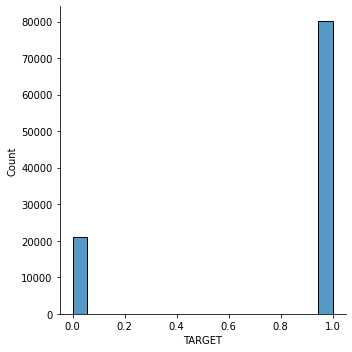

In [37]:
sns.displot( df1_train['TARGET'] )

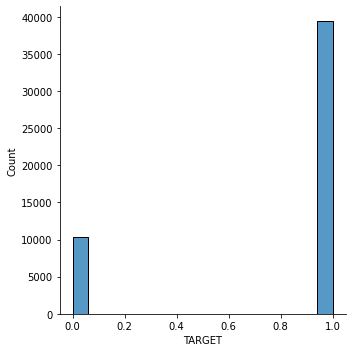

In [38]:
sns.displot( df1_test['TARGET'] )

- Nesses graficos vemos que realmente temos muito mais bons pagadores do que mal pagadores no treino e no teste
 
 
- Isso é um bom sinal, pois em outros casos temos uma diferença muito gritante, isso força a aplicação de tecnicas de redistribuição do dataset

### Categorical attributes

In [39]:
cat_attributes['TARGET'] = num_attributes['TARGET']

- Nas variáveis categóricas vejo importante vermos as distribuições de cada uma das que conseguimos saber a semântica clara da variável(i.e ESTADO, SITUACAO, SEXO)

<AxesSubplot: xlabel='ESTADO', ylabel='TARGET'>

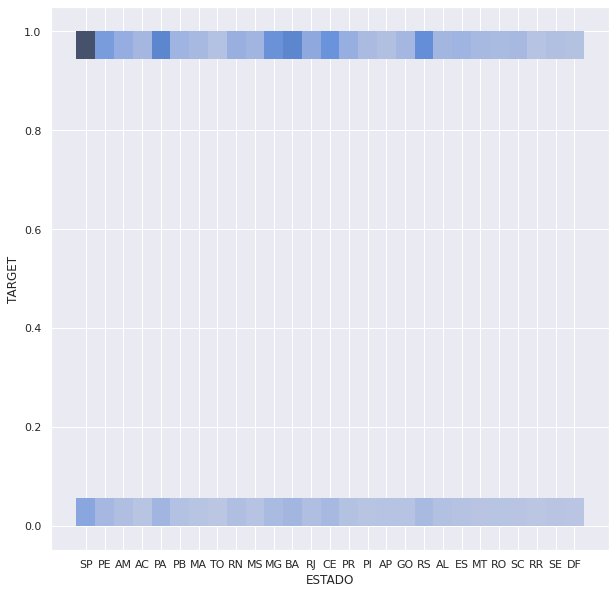

In [40]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot( x='ESTADO' , y='TARGET' , data=cat_attributes )


- Com esse gráfico podemos perceber que SP é o estado que temos mais exemplos no nosso dataset, e lá, aparentemente tem a maior relação de bons pagadores/mal pagadores

<AxesSubplot: xlabel='SITUACAO', ylabel='TARGET'>

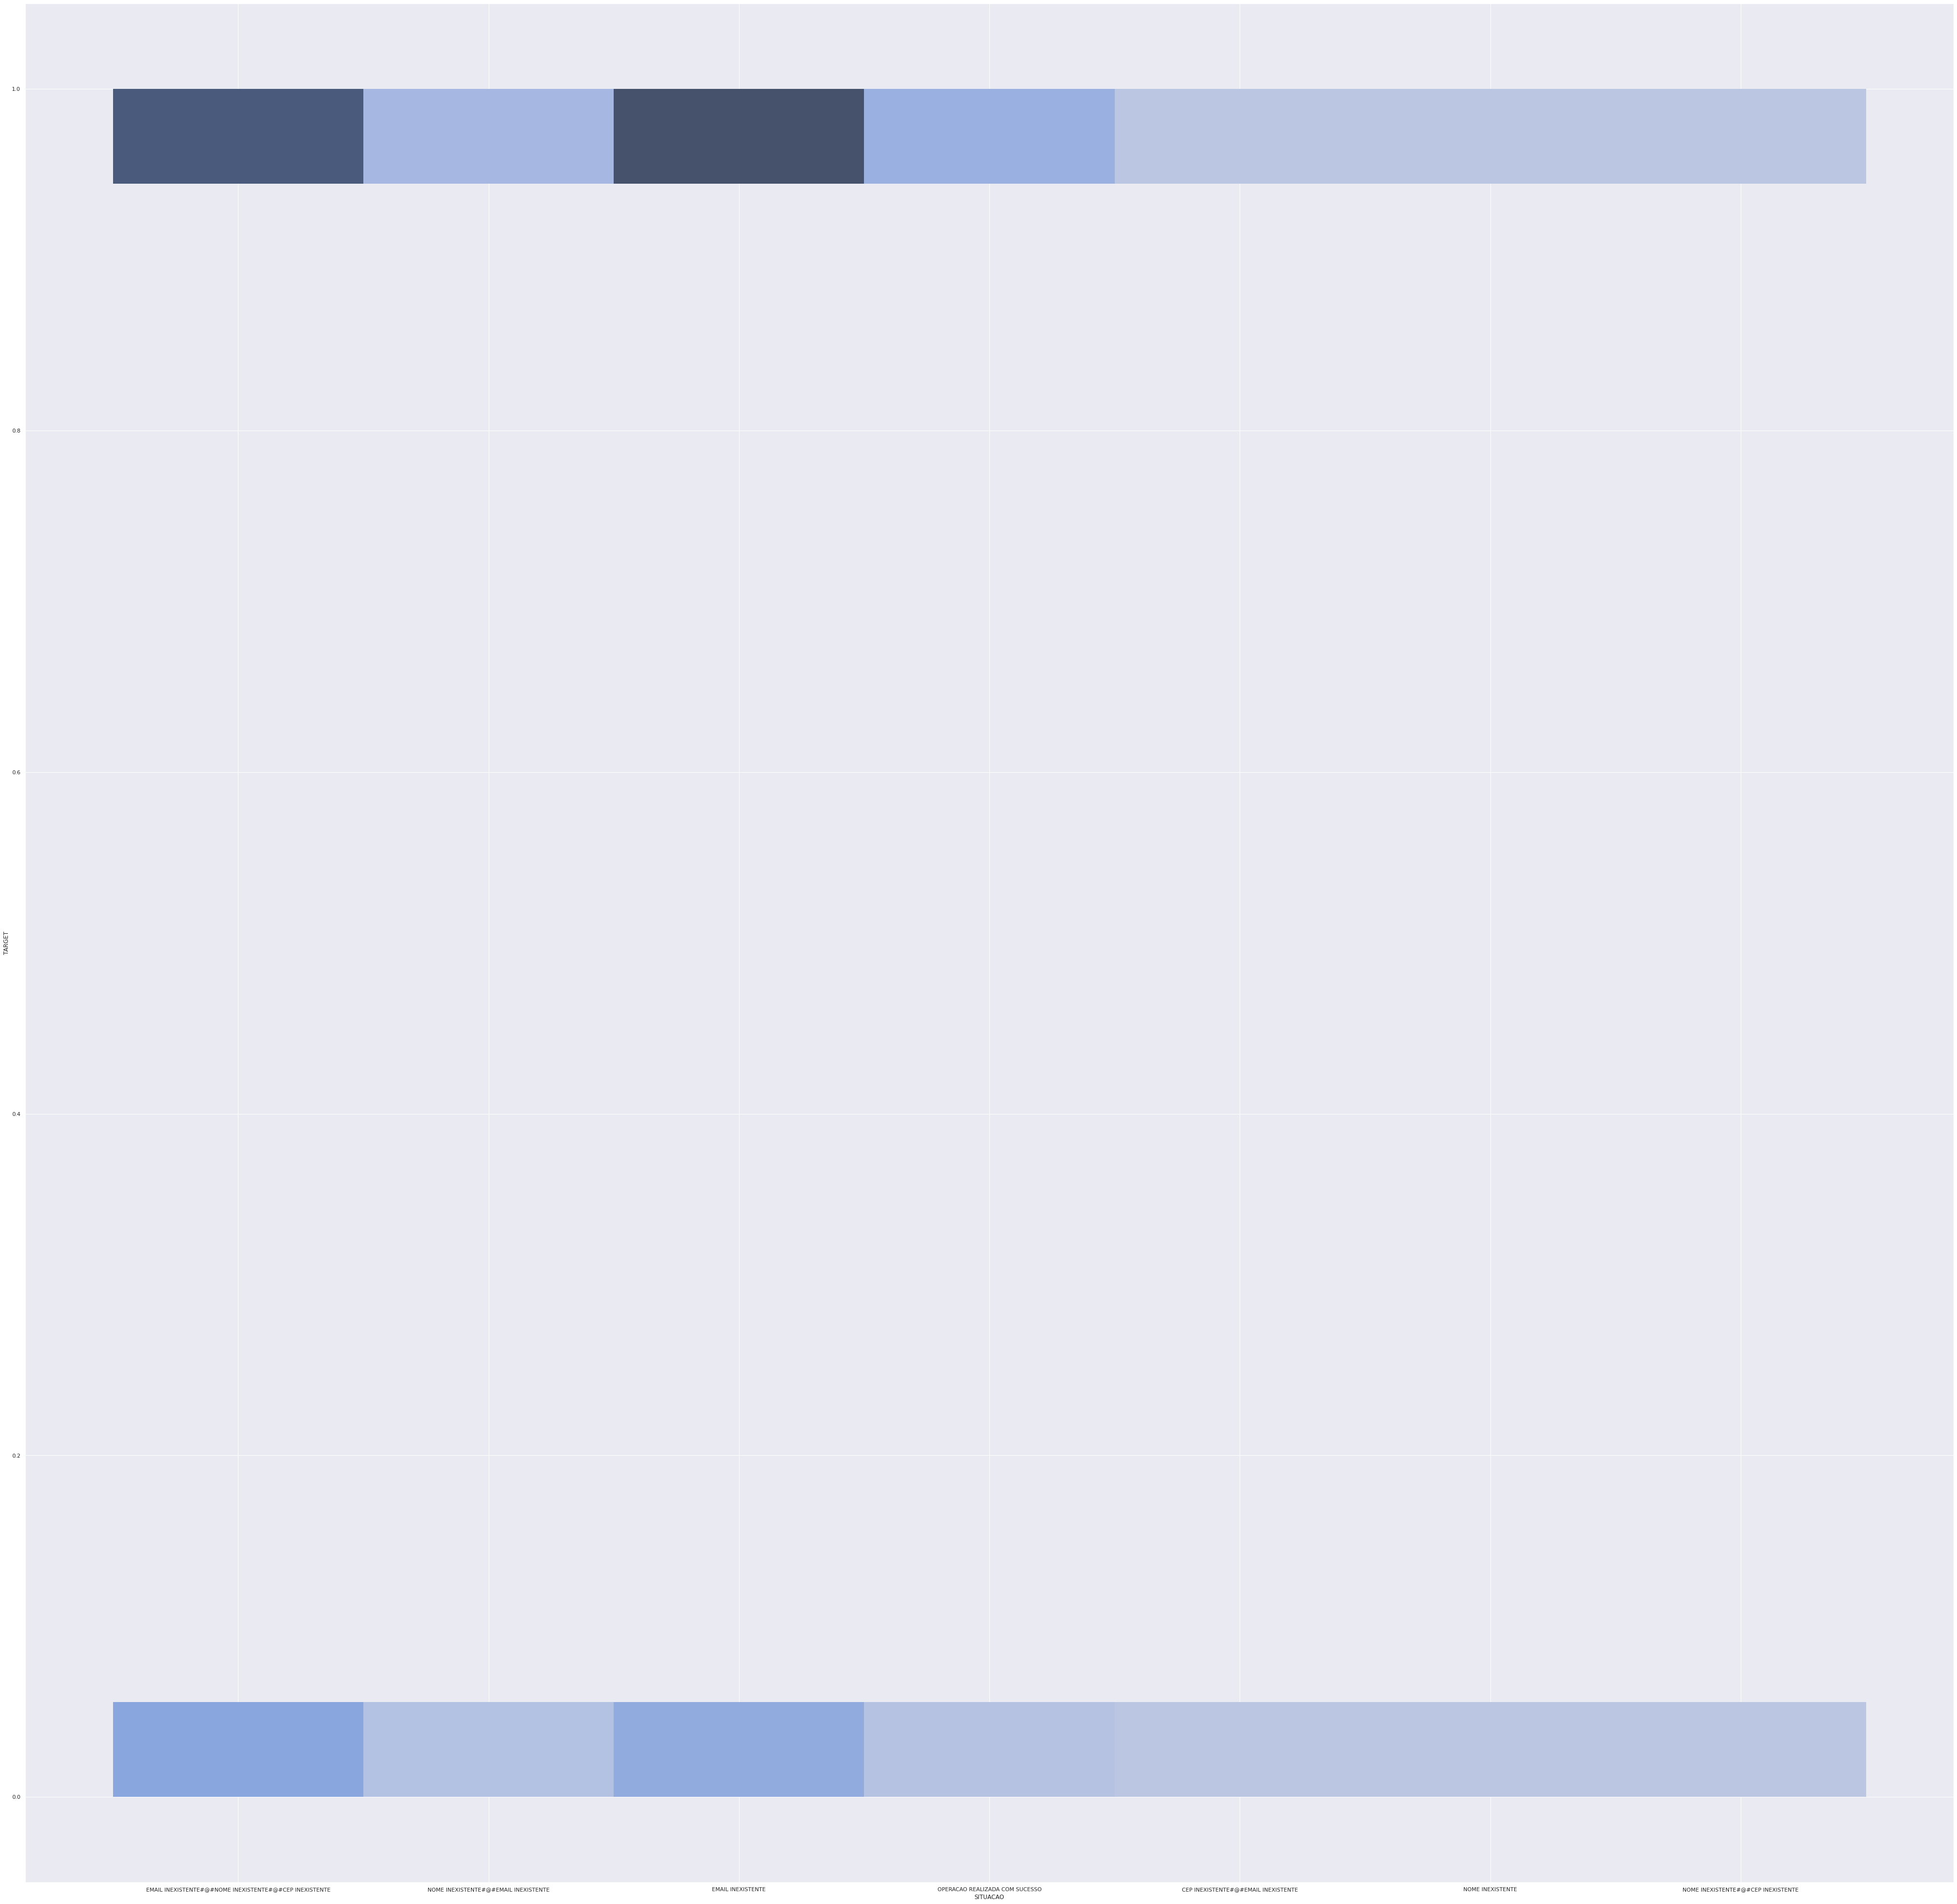

In [41]:
sns.set(rc={'figure.figsize':(70,70)})
sns.histplot( x='SITUACAO' , y='TARGET' , data=cat_attributes )

- Se quiser abrir essa imagem com mais definição é só baixar ou abrir em outra guia


- Com esse gráfico percebemos que as situações mais comuns, tanto para bons ou mal pagadores é a de Email inexistente e a categoria de EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE. 


- Isso pode ser interessante para nós quando estivermos levantando hipóteses sobre o funcionamento da fenômeno e também quando estivermos fazendo a correlação financeira ao final do projeto

<AxesSubplot: xlabel='SEXO', ylabel='TARGET'>

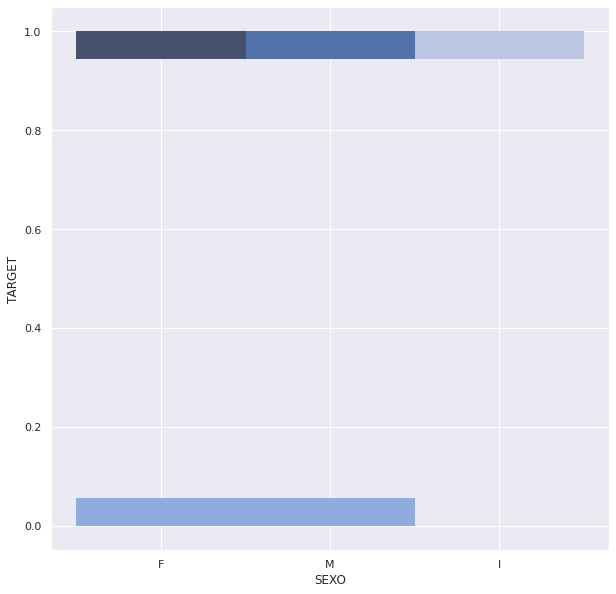

In [42]:
sns.set(rc={'figure.figsize':(10,10)})
sns.histplot( x='SEXO' , y='TARGET' , data=cat_attributes )

In [43]:
df1_train[df1_train['SEXO'] == 'M'].shape[0]

43970

In [44]:
df1_train[df1_train['SEXO'] == 'F'].shape[0]

57157

- Percebemos a partir desse histograma e vendo quantas mulheres e homens existem no conjunto de treino, temos que as mulheres são mais boas pagadoras do que homens.


- Podemos refutar essa hipotese mais a frente na EDA

# Feature engineering

In [45]:
df2_oot   = df1_oot.copy()
df2_train = df1_train.copy()
df2_test  = df1_test.copy()

## Hypotheses mind map

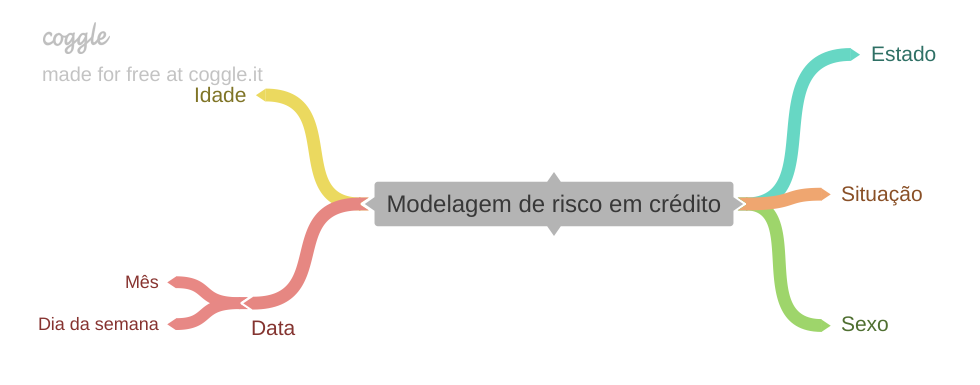

In [46]:
Image( '/home/eduardo/Desktop/DS/granting-of-credit/images/Modelagem_de_risco_em_credito.png' )

## List of hypotheses based on categorical variables

- 1.0 Mulheres são mais boas pagadoras do que homens?
- 2.0 Pessoas mais jovens são mais mal pagadoras?
- 3.0 Tem algum estado que as pessoas pagam muito mais mal que nos outros?
- 4.0 Qual situação é mais encontrada quando falamos de mal pagadores?
- 5.0 Existe alguma relação clara entre o dia da semana com pessoas mal pagadoras?

## Feature engineering

- Aqui vou criar uma colunas para podermos avaliar por dia o histórico de emprestimo de crédito
    - Não quero me criar uma avaliação por mês pois no conjunto de dados out of time não temos o smesmos meses que aqui, pois são de setembro a novembro de 2017


- Julgo que essa coluna a mais é necessária para podermos fazer o modelo aprender melhor se tiver alguma relação de dia com a quantidade de pessoas mal pagadoras.

- Além disso, vou transformar a idade para int, pois agora está como float

In [47]:
# day
df2_train['DAY'] = df2_train['REF_DATE'].dt.dayofweek
# idade
df2_train['IDADE'] = df2_train['IDADE'].astype('int64')

In [48]:
# day
df2_test['DAY'] = df2_test['REF_DATE'].dt.dayofweek
# idade
df2_test['IDADE'] = df2_test['IDADE'].astype('int64')

In [49]:
# day
df2_oot['DAY'] = df2_oot['REF_DATE'].dt.dayofweek
# idade
df2_oot['IDADE'] = df2_oot['IDADE'].astype('int64')

# Variable filtering

In [50]:
df3_oot   = df2_oot.copy()
df3_train = df2_train.copy()
df3_test  = df2_test.copy()

## rows filtering

- Nessa seção poderia ser a filtragem das linhas, baseadas em alguma regra de negócio passadas previamente. Como não tem nenhuma já que a política AS_IS é apenas para aplicar ao final

In [51]:
# df3_train = as_is_policy(df3_train)
# df3_test = as_is_policy(df3_test)
# df3_oot = as_is_policy(df3_oot)

# Exploratory data analysis

In [143]:
df4_oot   = df3_oot.copy()
df4_train = df3_train.copy()
df4_test  = df3_test.copy()

In [53]:
num_attributes = df4_train.select_dtypes( include=['int64', 'float64'] )
cat_attributes = df4_train.select_dtypes( exclude=['int64', 'float64', 'datetime64[ns]'] )

## Univariate analysis

### Respose variable

- Como ja tinhamos visto no na etapa Descriptive statistical, a variável 'Target' ficou um pouco mais desproporcional, ou seja, temos mais bons pagadores nessa faixa de idade(>28 anos)
    - A aplicação da política foi necessária pois não adianta treinarmos com dados que o cliente final não vai dar input, ou seja, os modelos vão aprender de forma equivocada pois vão estar levando a idade >28 anos em consideração para a classificação 
        - Claro que temos que adotar outra estratégia se percebemos alguma performance do nosso modelo final

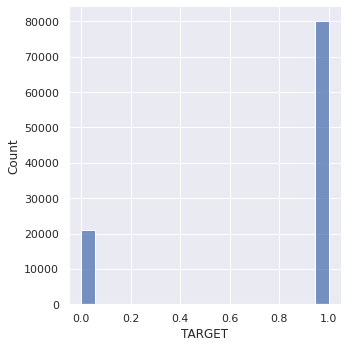

In [54]:
sns.displot(df4_train['TARGET'])

### Numerical variable

- Aqui conseguimos ver as distribuições de todas as variaveis numéricas
    - Chamo atenção para
        - DAY que mostra que todos os dias temos uma mesma quantidade de casos
            - Menos no domingo


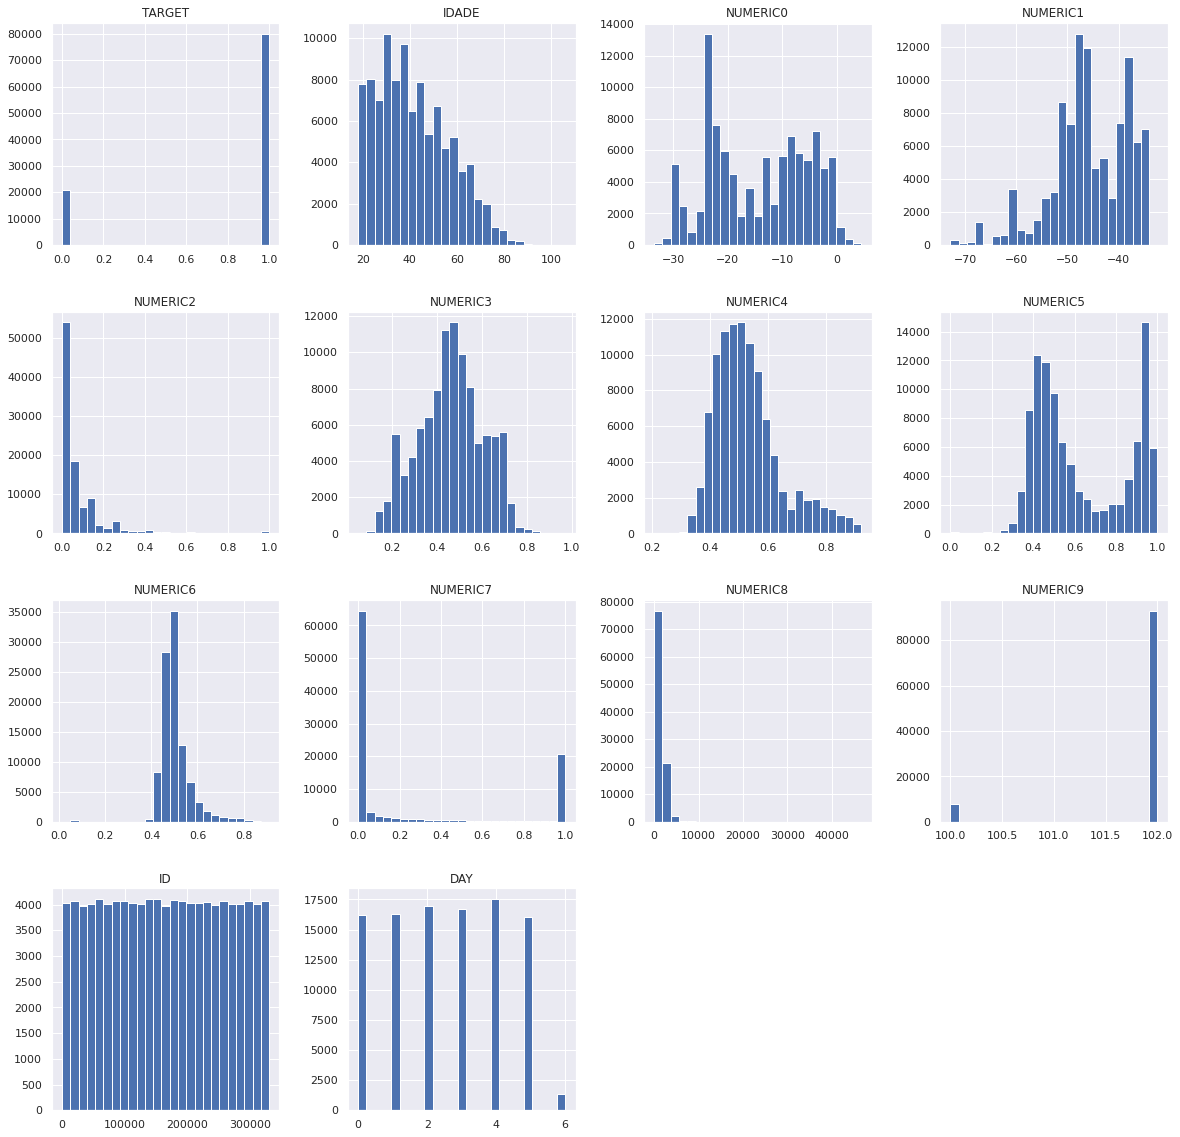

In [55]:
sns.set(rc={'figure.figsize':(20,20)})
num_attributes.hist( bins=25 );

## Bivariate analysis

### Mulheres são mais boas pagadoras do que homens? (VERDADEIRO)


- Para isso, vou mostrar a relação de bom_pagador/mal_pagador e ver qual a mais alta

In [56]:
"A porcentagem de homens bons pagadores é: {}".format((df4_train.loc[(df4_train['SEXO'] == 'M') & (df4_train['TARGET'] == 1)].shape[0])/df4_train.loc[(df4_train['SEXO'] == 'M')].shape[0])

'A porcentagem de homens bons pagadores é: 0.7595633386399818'

In [57]:
"A porcentagem de mulheres boas pagadoras é: {}".format((df4_train.loc[(df4_train['SEXO'] == 'F') & (df4_train['TARGET'] == 1)].shape[0])/df4_train.loc[(df4_train['SEXO'] == 'F')].shape[0])

'A porcentagem de mulheres boas pagadoras é: 0.8175901464387564'

- A conclusão entao é que essa hipótese é verdadeira

### Pessoas mais jovens são mais mal pagadoras? (VERDADEIRO)



- Vou colocar 4 faixas de idade para avaliar 
    - dos 30 aos 40
    - dos 40 aos 50
    - dos 50 aos 70
    - a partir de 70


In [59]:
"A porcentagem de pessoas com idade de 30 a 40 anos boas pagadoras é: {}".format((df4_train.loc[(df4_train['IDADE'] >= 30) & (df4_train['IDADE'] < 40) & (df4_train['TARGET'] == 1)].shape[0])/df4_train.loc[(df4_train['IDADE'] >= 30) & (df4_train['IDADE'] < 40)].shape[0])

'A porcentagem de pessoas com idade de 30 a 40 anos boas pagadoras é: 0.7731310431569846'

In [60]:
"A porcentagem de pessoas com idade de 40 a 50 anos boas pagadoras é: {}".format((df4_train.loc[(df4_train['IDADE'] >= 40) & (df4_train['IDADE'] < 50) & (df4_train['TARGET'] == 1)].shape[0])/df4_train.loc[(df4_train['IDADE'] >= 40) & (df4_train['IDADE'] < 50)].shape[0])

'A porcentagem de pessoas com idade de 40 a 50 anos boas pagadoras é: 0.7997672889158699'

In [61]:
"A porcentagem de pessoas com idade de 50 a 70 anos boas pagadoras é: {}".format((df4_train.loc[(df4_train['IDADE'] >= 50) & (df4_train['IDADE'] < 70) & (df4_train['TARGET'] == 1)].shape[0])/df4_train.loc[(df4_train['IDADE'] >= 50) & (df4_train['IDADE'] < 70)].shape[0])

'A porcentagem de pessoas com idade de 50 a 70 anos boas pagadoras é: 0.8538063964559126'

In [62]:
"A porcentagem de pessoas com idade a partir de 70 boas pagadoras é: {}".format((df4_train.loc[(df4_train['IDADE'] >= 70) & (df4_train['TARGET'] == 1)].shape[0])/df4_train.loc[(df4_train['IDADE'] >= 70)].shape[0])

'A porcentagem de pessoas com idade a partir de 70 boas pagadoras é: 0.8574401664932362'

- Com isso, é válido afirmar que pessoas mais jovens são mais mal pagadoras do que as com mais idade

### Tem algum estado que as pessoas pagam muito mais mal que nos outros? (VERDADEIRO)


In [63]:
df_aux = pd.crosstab(df4_train.TARGET,df4_train.ESTADO).T
df_aux.iloc[:,0]/(df_aux.iloc[:,0] + df_aux.iloc[:,1])

ESTADO
AC    0.169697
AL    0.274599
AM    0.235096
AP    0.311518
BA    0.204738
CE    0.206320
DF    0.239130
ES    0.188111
GO    0.188856
MA    0.186978
MG    0.178483
MS    0.165138
MT    0.153104
PA    0.215186
PB    0.237424
PE    0.249836
PI    0.195244
PR    0.175641
RJ    0.211097
RN    0.250906
RO    0.166216
RR    0.218182
RS    0.183345
SC    0.164067
SE    0.243269
SP    0.212167
TO    0.168639
dtype: float64

- Com isso, é válido afirmar que o AMAPÁ(AP) é o estado onde mais tem mal pagadores proporcionalmente

### Qual situação é mais encontrada quando falamos de mal pagadores? (EMAIL INEXISTENTE) 


In [64]:
df_aux = pd.crosstab(df4_train.TARGET,df4_train.SITUACAO).T
df_aux.iloc[:,0]

SITUACAO
CEP INEXISTENTE#@#EMAIL INEXISTENTE                         92
EMAIL INEXISTENTE                                         8126
EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE    9642
NOME INEXISTENTE                                            67
NOME INEXISTENTE#@#CEP INEXISTENTE                           1
NOME INEXISTENTE#@#EMAIL INEXISTENTE                      1762
OPERACAO REALIZADA COM SUCESSO                            1308
Name: 0, dtype: int64

- Percebemos que a situação mais encontrada quando falamos de mal pagadores é a de EMAIL INEXISTENTE

### Existe alguma relação clara entre o dia da semana com pessoas mal pagadoras? (NÃO)

In [65]:
df_aux = pd.crosstab(df4_train.TARGET,df4_train.DAY).T
df_aux.iloc[:,0]/(df_aux.iloc[:,0] + df_aux.iloc[:,1])

DAY
0    0.215001
1    0.209402
2    0.214656
3    0.209140
4    0.213003
5    0.184530
6    0.196269
dtype: float64

- Não existe relação clara entre dia da semana e mal pagadores, apenas que no sabado e domingo foram registrados proporcionalmente menos casos

## Multivariate analysis

### Numerical attributes

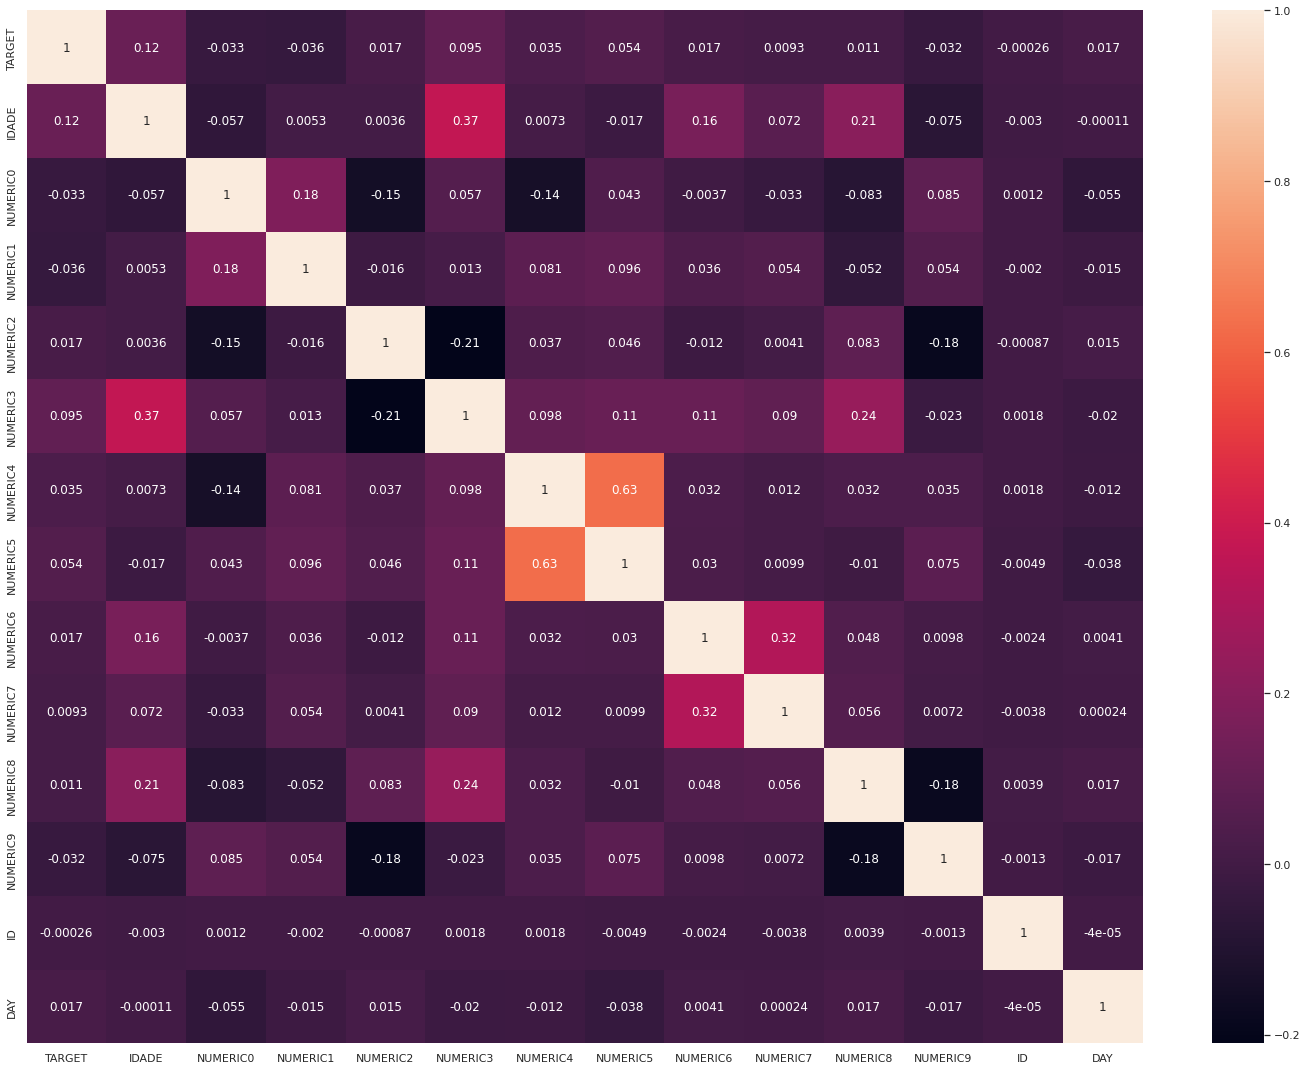

In [66]:
correlation = num_attributes.corr( method='pearson' )
plt.figure( figsize=( 25, 19 ) )
sns.heatmap( correlation, annot=True );

- Chegamos a conclusão olhando para esse heatmap que não temos muito variáveis agora que vão ajudar no processo de decisão, apenas a idade que tem uma correlação mais forte 

# Data preparation

In [67]:
df5_oot   = df4_oot.copy()
df5_train = df4_train.copy()
df5_test  = df4_test.copy()

## Normalization


- Não vou fazer a normalização pois nenhuma variável categórica tem uma distribuição que pareça normal

- Como vimos na descrição dos dados

## Rescaling

- É necessário deixar na mesma escala, pois os algoritmos conseguem aprender melhor(principalmente os de aprendizagem profunda)

In [68]:
a_train = df5_train.select_dtypes( include=['int64', 'float64'] )

In [69]:
a_test = df5_test.select_dtypes( include=['int64', 'float64'] )

In [70]:
a_oot = df5_oot.select_dtypes( include=['int64', 'float64'] )

- Não vou analisar target pois ela ja está com os valores adequados 

<AxesSubplot: >

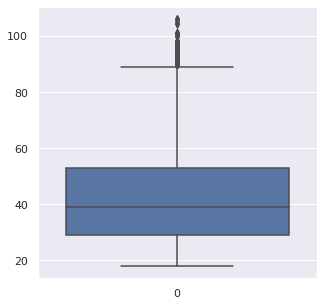

In [71]:
# idade
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['IDADE'] )


<AxesSubplot: >

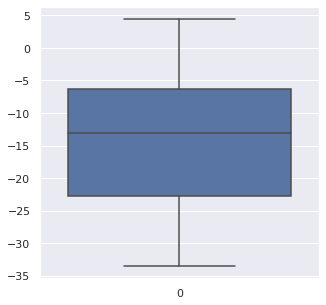

In [72]:
# Numeric0
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC0'] )

<AxesSubplot: >

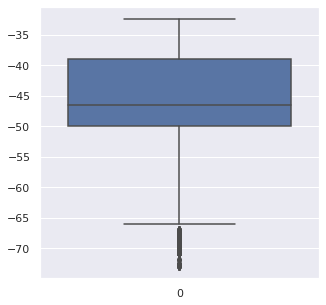

In [73]:
# Numeric1
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC1'] )

<AxesSubplot: >

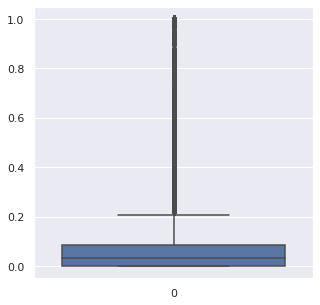

In [74]:
# Numeric2
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC2'] )

<AxesSubplot: >

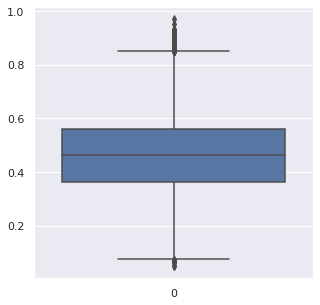

In [75]:
# Numeric3
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC3'] )

<AxesSubplot: >

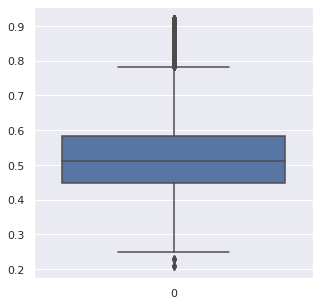

In [76]:
# Numeric4
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC4'] )

<AxesSubplot: >

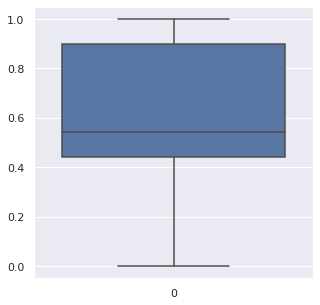

In [77]:
# Numeric5
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC5'] )

<AxesSubplot: >

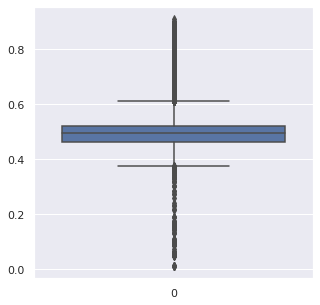

In [78]:
# Numeric6
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC6'] )

<AxesSubplot: >

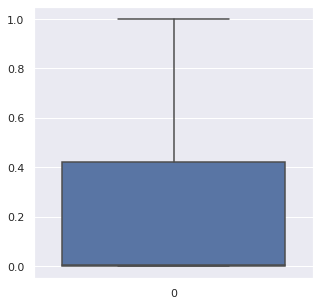

In [79]:
# Numeric7
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC7'] )

<AxesSubplot: >

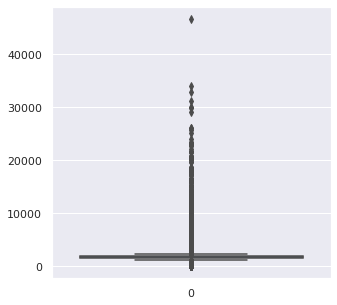

In [80]:
# Numeric8
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC8'] )

<AxesSubplot: >

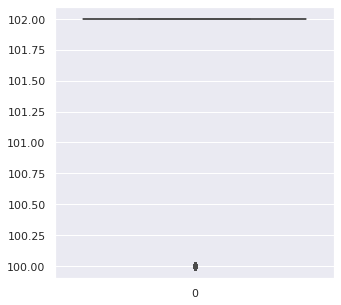

In [81]:
# Numeric9
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['NUMERIC9'] )

<AxesSubplot: >

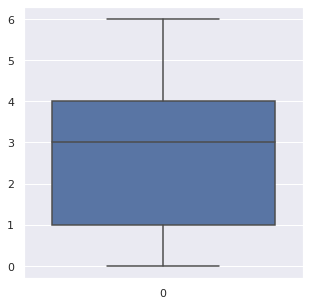

In [82]:
# day
sns.set(rc={'figure.figsize':(5,5)})
sns.boxplot( a_train['DAY'] )

In [83]:
rs =  RobustScaler()
mms = MinMaxScaler()

# Poucos outliers 
df5_train['IDADE'] = rs.fit_transform( df5_train[['IDADE']].values ) 
df5_train['NUMERIC1'] = rs.fit_transform( df5_train[['NUMERIC1']].values ) 
df5_train['NUMERIC2'] = rs.fit_transform( df5_train[['NUMERIC2']].values ) 
df5_train['NUMERIC3'] = rs.fit_transform( df5_train[['NUMERIC3']].values ) 
df5_train['NUMERIC4'] = rs.fit_transform( df5_train[['NUMERIC4']].values ) 
df5_train['NUMERIC6'] = rs.fit_transform( df5_train[['NUMERIC6']].values ) 
df5_train['NUMERIC8'] = rs.fit_transform( df5_train[['NUMERIC8']].values ) 
df5_train['NUMERIC9'] = rs.fit_transform( df5_train[['NUMERIC9']].values ) 


# Muitos outliers
df5_train['NUMERIC0'] = mms.fit_transform( df5_train[['NUMERIC0']].values )
df5_train['NUMERIC5'] = mms.fit_transform( df5_train[['NUMERIC5']].values )
df5_train['NUMERIC7'] = mms.fit_transform( df5_train[['NUMERIC7']].values )
df5_train['DAY'] = mms.fit_transform( df5_train[['DAY']].values )



In [84]:
# Poucos outliers 
df5_test['IDADE'] = rs.fit_transform( df5_test[['IDADE']].values ) 
df5_test['NUMERIC1'] = rs.fit_transform( df5_test[['NUMERIC1']].values ) 
df5_test['NUMERIC2'] = rs.fit_transform( df5_test[['NUMERIC2']].values ) 
df5_test['NUMERIC3'] = rs.fit_transform( df5_test[['NUMERIC3']].values ) 
df5_test['NUMERIC4'] = rs.fit_transform( df5_test[['NUMERIC4']].values ) 
df5_test['NUMERIC6'] = rs.fit_transform( df5_test[['NUMERIC6']].values ) 
df5_test['NUMERIC8'] = rs.fit_transform( df5_test[['NUMERIC8']].values ) 
df5_test['NUMERIC9'] = rs.fit_transform( df5_test[['NUMERIC9']].values ) 


# Muitos outliers
df5_test['NUMERIC0'] = mms.fit_transform( df5_test[['NUMERIC0']].values )
df5_test['NUMERIC5'] = mms.fit_transform( df5_test[['NUMERIC5']].values )
df5_test['NUMERIC7'] = mms.fit_transform( df5_test[['NUMERIC7']].values )
df5_test['DAY'] = mms.fit_transform( df5_test[['DAY']].values )

In [85]:
# Poucos outliers 
df5_oot['IDADE'] = rs.fit_transform( df5_oot[['IDADE']].values ) 
df5_oot['NUMERIC1'] = rs.fit_transform( df5_oot[['NUMERIC1']].values ) 
df5_oot['NUMERIC2'] = rs.fit_transform( df5_oot[['NUMERIC2']].values ) 
df5_oot['NUMERIC3'] = rs.fit_transform( df5_oot[['NUMERIC3']].values ) 
df5_oot['NUMERIC4'] = rs.fit_transform( df5_oot[['NUMERIC4']].values ) 
df5_oot['NUMERIC6'] = rs.fit_transform( df5_oot[['NUMERIC6']].values ) 
df5_oot['NUMERIC8'] = rs.fit_transform( df5_oot[['NUMERIC8']].values ) 
df5_oot['NUMERIC9'] = rs.fit_transform( df5_oot[['NUMERIC9']].values ) 


# Muitos outliers
df5_oot['NUMERIC0'] = mms.fit_transform( df5_oot[['NUMERIC0']].values )
df5_oot['NUMERIC5'] = mms.fit_transform( df5_oot[['NUMERIC5']].values )
df5_oot['NUMERIC7'] = mms.fit_transform( df5_oot[['NUMERIC7']].values )
df5_oot['DAY'] = mms.fit_transform( df5_oot[['DAY']].values )

## Transformation

### Encoding

- Vamos aplicar o encoding nas variáveis que eu tinha separado anteriormente no passo de Data Description

In [86]:
# Variáveis Ordinal encoding

# Criando o dicionário de mapeamento
mapping_ordinal = {'BAIXISSIMA': 1, 'BAIXA': 2, 'MEDIA': 3, 'ALTA': 4, 'ALTISSIMA': 5, 'MUITO PROXIMO': 1,
                   'PROXIMO': 2, 'MEDIO': 3, 'LONGE': 4, 'MUITO LONGE':5}

# Aplicando o mapeamento as colunas ORDINALS
for numero_iloc, ignorar_cont in enumerate(cols_enc_ordinal):
    df5_train[f'ORDINAL{numero_iloc}'] = df5_train[f'ORDINAL{numero_iloc}'].map(mapping_ordinal)
for numero_iloc, ignorar_cont in enumerate(cols_enc_ordinal):
    df5_test[f'ORDINAL{numero_iloc}'] = df5_test[f'ORDINAL{numero_iloc}'].map(mapping_ordinal)
for numero_iloc, ignorar_cont in enumerate(cols_enc_ordinal):
    df5_oot[f'ORDINAL{numero_iloc}'] = df5_oot[f'ORDINAL{numero_iloc}'].map(mapping_ordinal)

In [87]:
# Variáveis Label encoding

# Instanciando a classe
encoder = LabelEncoder()

# Aplicando o mapeamento as colunas LABELS
for ignorar, nome_label in enumerate(df5_train.columns.to_list()):
    if 'LABEL' in nome_label:
        df5_train[f'{nome_label}'] = encoder.fit_transform(df5_train[f'{nome_label}'])
        
for ignorar, nome_label in enumerate(df5_test.columns.to_list()):
    if 'LABEL' in nome_label:
        df5_test[f'{nome_label}'] = encoder.fit_transform(df5_test[f'{nome_label}']) 
        
for ignorar, nome_label in enumerate(df5_train.columns.to_list()):
    if 'LABEL' in nome_label:
        df5_oot[f'{nome_label}'] = encoder.fit_transform(df5_oot[f'{nome_label}'])
        
df5_train['ESTADO'] = encoder.fit_transform(df5_train['ESTADO'])
df5_test['ESTADO'] = encoder.fit_transform(df5_test['ESTADO'])
df5_oot['ESTADO'] = encoder.fit_transform(df5_oot['ESTADO'])

In [88]:
analysis = df1_train.iloc[:,-2]

print(analysis.dropna(axis=0).unique())

print(f'\n\n{analysis}')

print(f'\n\n{list(float_cols)+list(int_cols)}')

['2.6.1']


0         2.6.1
1         2.6.1
2         2.6.1
3         2.6.1
4         2.6.1
          ...  
101123    2.6.1
101124    2.6.1
101125    2.6.1
101126    2.6.1
101127    2.6.1
Name: VERSAO, Length: 101128, dtype: object


['IDADE', 'VAR6', 'VAR7', 'VAR11', 'VAR12', 'VAR13', 'VAR14', 'VAR15', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR21', 'VAR22', 'VAR23', 'VAR24', 'VAR25', 'VAR26', 'VAR27', 'VAR28', 'VAR29', 'VAR30', 'VAR37', 'VAR39', 'VAR40', 'VAR41', 'VAR42', 'VAR44', 'VAR46', 'VAR47', 'VAR141', 'VAR145', 'VAR146', 'TARGET', 'VAR147', 'ID']


In [89]:
# Encoding SEXO
mapping_SEXO = {'F': 1, 'M': 0, 'I': 2}

# Aplicando o mapeamento as colunas ORDINALS
df5_train['SEXO'] = df5_train['SEXO'].map(mapping_SEXO)

# Encoding SITUACAO
mapping_SITUACAO = {'EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE': 0, 'NOME INEXISTENTE#@#EMAIL INEXISTENTE': 1, 
                'EMAIL INEXISTENTE': 2, 'OPERACAO REALIZADA COM SUCESSO': 3, 'CEP INEXISTENTE#@#EMAIL INEXISTENTE': 4,
                'NOME INEXISTENTE': 5, 'NOME INEXISTENTE#@#CEP INEXISTENTE': 6}

df5_train['SITUACAO'] = df5_train['SITUACAO'].map(mapping_SITUACAO)

# Encoding VERSAO
mapping_VERSAO = {'2.6.1': 0}

df5_train['VERSAO'] = df5_train['VERSAO'].map(mapping_VERSAO)

In [90]:
# Encoding SEXO
mapping_SEXO = {'F': 1, 'M': 0, 'I': 2}

# Aplicando o mapeamento as colunas ORDINALS
df5_test['SEXO'] = df5_test['SEXO'].map(mapping_SEXO)

# Encoding SITUACAO
mapping_SITUACAO = {'EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE': 0, 'NOME INEXISTENTE#@#EMAIL INEXISTENTE': 1, 
                'EMAIL INEXISTENTE': 2, 'OPERACAO REALIZADA COM SUCESSO': 3, 'CEP INEXISTENTE#@#EMAIL INEXISTENTE': 4,
                'NOME INEXISTENTE': 5, 'NOME INEXISTENTE#@#CEP INEXISTENTE': 6}

df5_test['SITUACAO'] = df5_test['SITUACAO'].map(mapping_SITUACAO)

# Encoding VERSAO
mapping_VERSAO = {'2.6.1': 0}

df5_test['VERSAO'] = df5_test['VERSAO'].map(mapping_VERSAO)

In [91]:
# Encoding SEXO
mapping_SEXO = {'F': 1, 'M': 0, 'I': 2}

# Aplicando o mapeamento as colunas ORDINALS
df5_oot['SEXO'] = df5_oot['SEXO'].map(mapping_SEXO)

# Encoding SITUACAO
mapping_SITUACAO = {'EMAIL INEXISTENTE#@#NOME INEXISTENTE#@#CEP INEXISTENTE': 0, 'NOME INEXISTENTE#@#EMAIL INEXISTENTE': 1, 
                'EMAIL INEXISTENTE': 2, 'OPERACAO REALIZADA COM SUCESSO': 3, 'CEP INEXISTENTE#@#EMAIL INEXISTENTE': 4,
                'NOME INEXISTENTE': 5, 'NOME INEXISTENTE#@#CEP INEXISTENTE': 6}

df5_oot['SITUACAO'] = df5_oot['SITUACAO'].map(mapping_SITUACAO)

# Encoding VERSAO
mapping_VERSAO = {'2.6.1': 0}

df5_oot['VERSAO'] = df5_oot['VERSAO'].map(mapping_VERSAO)

### Nature transformation(cycle transformation)

In [92]:
# day
df5_train['DAY_SIN'] = df5_train['DAY'].apply( lambda x: np.sin( x * ( 2 * np.pi/30 ) ) )
df5_train['DAY_COS'] = df5_train['DAY'].apply( lambda x: np.cos( x * ( 2 * np.pi/30 ) ) )

df5_train.drop(columns='DAY')

,REF_DATE,TARGET,SEXO,IDADE,ESTADO,NUMERIC0,NUMERIC1,LABEL2,ORDINAL0,NUMERIC2,...,ORDINAL74,ORDINAL75,NUMERIC8,LABEL3,NUMERIC9,SITUACAO,VERSAO,ID,DAY_SIN,DAY_COS
0,2017-06-16 00:00:00+00:00,1,1,1.541667,25,0.261921,-0.020924,4,2,0.209302,...,4,1,7.947593,2,0.0,0,0,123791,0.139173,0.990268
1,2017-02-07 00:00:00+00:00,1,1,1.541667,25,0.271889,-0.021995,4,3,1.209302,...,3,1,-0.899623,4,0.0,0,0,246754,0.034899,0.999391
2,2017-03-11 00:00:00+00:00,1,1,1.541667,15,0.683117,1.063643,4,5,1.209302,...,5,1,-0.639978,4,0.0,1,0,169817,0.173648,0.984808
3,2017-04-28 00:00:00+00:00,1,1,1.083333,2,0.800064,-1.236682,4,3,-0.395349,...,3,4,-0.477645,4,0.0,2,0,26525,0.139173,0.990268
4,2017-02-15 00:00:00+00:00,1,0,-0.625000,0,0.618594,-1.951999,4,4,-0.197674,...,2,5,-0.214177,4,0.0,0,0,143859,0.069756,0.997564
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101123,2017-03-07 00:00:00+00:00,1,0,-0.291667,16,0.749513,0.378846,4,5,0.209302,...,4,5,0.321502,4,0.0,0,0,248102,0.034899,0.999391
101124,2017-08-11 00:00:00+00:00,1,1,-0.833333,10,0.326127,0.213593,4,3,0.209302,...,2,5,-0.808232,4,0.0,0,0,217518,0.139173,0.990268
101125,2017-06-29 00:00:00+00:00,0,1,-0.750000,17,0.223036,-0.456453,4,4,0.209302,...,5,5,-0.808232,4,0.0,2,0,58018,0.104528,0.994522
101126,2017-04-22 00:00:00+00:00,1,1,-0.750000,4,0.541535,0.743897,4,4,0.209302,...,3,2,-0.734837,4,0.0,1,0,208563,0.173648,0.984808


In [93]:
# day
df5_test['DAY_SIN'] = df5_test['DAY'].apply( lambda x: np.sin( x * ( 2 * np.pi/30 ) ) )
df5_test['DAY_COS'] = df5_test['DAY'].apply( lambda x: np.cos( x * ( 2 * np.pi/30 ) ) )

df5_test.drop(columns='DAY')

,REF_DATE,TARGET,SEXO,IDADE,ESTADO,NUMERIC0,NUMERIC1,LABEL2,ORDINAL0,NUMERIC2,...,ORDINAL74,ORDINAL75,NUMERIC8,LABEL3,NUMERIC9,SITUACAO,VERSAO,ID,DAY_SIN,DAY_COS
0,2017-03-25 00:00:00+00:00,1,0,0.181818,17,0.210521,-0.245271,4,3,0.406977,...,3,1,7.760279,2,-2.0,3.0,0,82396,0.173648,0.984808
1,2017-08-31 00:00:00+00:00,1,1,-0.363636,22,0.089509,-0.436161,4,5,4.813953,...,4,1,-0.377357,4,0.0,0.0,0,302199,0.104528,0.994522
2,2017-03-30 00:00:00+00:00,1,0,0.136364,25,0.261253,-0.004715,4,4,0.802326,...,3,3,0.622643,4,0.0,2.0,0,216668,0.104528,0.994522
3,2017-08-24 00:00:00+00:00,1,1,1.136364,25,0.264585,-0.019748,4,3,2.011628,...,2,1,-0.308117,4,0.0,2.0,0,65194,0.104528,0.994522
4,2017-01-14 00:00:00+00:00,1,0,-0.818182,2,0.797150,-1.089902,4,1,-0.395349,...,3,5,-0.187188,4,0.0,0.0,0,108711,0.173648,0.984808
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49805,2017-03-13 00:00:00+00:00,1,1,-0.045455,6,0.459414,-0.130392,4,3,0.406977,...,4,4,-0.111101,4,0.0,2.0,0,99029,0.000000,1.000000
49806,2017-07-05 00:00:00+00:00,1,0,0.772727,5,0.779777,0.737254,4,3,0.406977,...,2,4,0.640948,4,0.0,2.0,0,165533,0.069756,0.997564
49807,2017-04-04 00:00:00+00:00,0,1,0.090909,14,0.692627,1.075698,4,4,-0.395349,...,2,4,8.787694,2,0.0,2.0,0,24448,0.034899,0.999391
49808,2017-08-28 00:00:00+00:00,1,1,0.727273,0,0.641523,-2.029541,4,5,-0.395349,...,5,5,0.499885,4,0.0,2.0,0,77508,0.000000,1.000000


In [94]:
# day
df5_oot['DAY_SIN'] = df5_oot['DAY'].apply( lambda x: np.sin( x * ( 2 * np.pi/30 ) ) )
df5_oot['DAY_COS'] = df5_oot['DAY'].apply( lambda x: np.cos( x * ( 2 * np.pi/30 ) ) )

df5_oot.drop(columns='DAY')

,REF_DATE,SEXO,IDADE,ESTADO,NUMERIC0,NUMERIC1,LABEL2,ORDINAL0,NUMERIC2,NUMERIC3,...,ORDINAL74,ORDINAL75,NUMERIC8,LABEL3,NUMERIC9,SITUACAO,VERSAO,ID,DAY_SIN,DAY_COS
0,2017-12-26 00:00:00+00:00,1,1.260870,13,0.848029,-0.113217,4,4,NaN,1.016679,...,3,1,1.712592,3,0.0,0.0,0,78337,0.034899,0.999391
1,2017-12-03 00:00:00+00:00,1,0.173913,13,0.845008,-0.165346,4,2,-0.197674,-0.321863,...,4,4,-0.330204,4,0.0,2.0,0,264727,0.207912,0.978148
2,2017-10-22 00:00:00+00:00,0,-0.434783,25,0.261647,-0.004080,4,3,0.000000,-1.201966,...,3,3,-0.181381,4,0.0,0.0,0,246698,0.207912,0.978148
3,2017-12-27 00:00:00+00:00,1,1.173913,17,0.265729,-0.487651,4,4,1.813953,-0.997295,...,2,1,-0.209112,4,0.0,2.0,0,199912,0.069756,0.997564
4,2017-10-06 00:00:00+00:00,1,1.739130,18,0.282053,0.286696,4,3,-0.395349,1.069253,...,4,4,1.386185,3,0.0,2.0,0,107476,0.139173,0.990268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80464,2017-11-24 00:00:00+00:00,0,1.347826,13,0.844649,-0.164028,4,3,0.802326,-0.224962,...,2,3,3.705692,3,0.0,0.0,0,116328,0.139173,0.990268
80465,2017-09-16 00:00:00+00:00,0,0.086957,7,0.377148,0.616837,4,5,0.000000,-0.405629,...,5,5,0.398091,4,0.0,0.0,0,317690,0.173648,0.984808
80466,2017-11-13 00:00:00+00:00,1,-0.478261,15,0.657389,0.840275,4,5,0.000000,0.008436,...,5,5,-0.764822,4,0.0,0.0,0,276488,0.000000,1.000000
80467,2017-12-01 00:00:00+00:00,1,0.695652,10,0.345683,0.298984,4,5,0.209302,0.224667,...,4,1,-0.029329,4,0.0,2.0,0,152851,0.139173,0.990268


# Feature selection

In [95]:
df6_oot   = df5_oot.copy()
df6_train = df5_train.copy()
df6_test  = df5_test.copy()

## Feature selector

In [96]:
x_train = df6_train.drop(['TARGET', 'REF_DATE'], axis=1)
y_train = df6_train['TARGET']


In [97]:
# Criando o classificador
clf = RandomForestClassifier(n_estimators=100)

# Instanciando a classe SelectFromModel
selector = SelectFromModel(clf)


In [98]:
# Ajustando o classificador e selecionando recursos
selector.fit(x_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

## Best features

In [99]:
# Obtendo os índices dos recursos selecionados
important_features = x_train.columns[selector.get_support()].to_list()
important_features

['IDADE',
 'ESTADO',
 'NUMERIC0',
 'NUMERIC1',
 'ORDINAL0',
 'NUMERIC2',
 'NUMERIC3',
 'NUMERIC4',
 'NUMERIC5',
 'NUMERIC6',
 'NUMERIC7',
 'NUMERIC8',
 'SITUACAO',
 'ID',
 'DAY',
 'DAY_SIN',
 'DAY_COS']

In [100]:
important_features.remove('DAY')

### Manual feature selection

In [101]:
cols_not_selected = np.setdiff1d( x_train.columns, important_features )
cols_not_selected

array(['DAY', 'LABEL10', 'LABEL11', 'LABEL12', 'LABEL13', 'LABEL14',
       'LABEL15', 'LABEL16', 'LABEL17', 'LABEL18', 'LABEL19', 'LABEL2',
       'LABEL20', 'LABEL21', 'LABEL22', 'LABEL3', 'LABEL6', 'LABEL7',
       'LABEL8', 'LABEL9', 'NUMERIC9', 'ORDINAL1', 'ORDINAL10',
       'ORDINAL11', 'ORDINAL12', 'ORDINAL13', 'ORDINAL14', 'ORDINAL15',
       'ORDINAL16', 'ORDINAL17', 'ORDINAL18', 'ORDINAL19', 'ORDINAL2',
       'ORDINAL20', 'ORDINAL21', 'ORDINAL22', 'ORDINAL23', 'ORDINAL24',
       'ORDINAL25', 'ORDINAL26', 'ORDINAL27', 'ORDINAL28', 'ORDINAL29',
       'ORDINAL3', 'ORDINAL30', 'ORDINAL31', 'ORDINAL32', 'ORDINAL33',
       'ORDINAL34', 'ORDINAL35', 'ORDINAL36', 'ORDINAL37', 'ORDINAL38',
       'ORDINAL39', 'ORDINAL4', 'ORDINAL40', 'ORDINAL41', 'ORDINAL42',
       'ORDINAL43', 'ORDINAL44', 'ORDINAL45', 'ORDINAL46', 'ORDINAL47',
       'ORDINAL48', 'ORDINAL49', 'ORDINAL5', 'ORDINAL50', 'ORDINAL51',
       'ORDINAL52', 'ORDINAL53', 'ORDINAL54', 'ORDINAL55', 'ORDINAL56',
       'O

- Não vejo nenhuma outra coluna que poderia usar como argumento para mudar o conjunto de features 

In [102]:
cols_to_add = ['TARGET', 'REF_DATE']

cols_selected_full = []

cols_selected_full = important_features.copy()
cols_selected_full.extend(cols_to_add)

In [103]:
len(cols_selected_full)

18

-  Temos então a redução de 114 colunas para 20

In [104]:
x_train['TARGET'] = df6_train['TARGET']
x_train['REF_DATE'] = df6_train['REF_DATE']

# ML models

- Nessa etapa vamos salvar todos os modelos sem aplicar a validação cruzada para poder usa-los sem precisar rodar novamente


- A partir dessa etapa vamos decidir qual melhor modelo para escolher como o final
    - Não vamos olhar a performance, mas o quão rápido é para treinar e o quanto de memória ele requere, pois não adianta ter um modelo que performa muito, mas não é escalável.
    

In [105]:
df7_oot   = df6_oot.copy()
df7_train = df6_train.copy()
df7_test  = df6_test.copy()

In [106]:
x_train = df7_train.loc[:,important_features]
x_test = df7_test.loc[:,important_features]

y_train = df7_train.loc[:,'TARGET']
y_test = df7_test.loc[:,'TARGET']

x_oot = df7_oot.loc[:, important_features]

x_training = df7_train.loc[:,cols_selected_full]
x_testing = df7_test.loc[:,cols_selected_full]

## Baseline Model( Naive Bayes )

In [107]:
x_test.fillna(method='ffill', inplace=True)

In [108]:
# Criação do modelo
clf = GaussianNB()

# Treinamento do modelo
clf.fit(x_train, y_train)

# Previsões
y_pred = clf.predict(x_test)

# Avaliação do desempenho
performance_general = [{'accuracy': accuracy_score(y_test, y_pred), 'precision_score': precision_score(y_test,y_pred),
                       'recall_score': recall_score(y_test,y_pred), 'f1_score': f1_score(y_test,y_pred)}]
performance_confusion_matrix = confusion_matrix(y_test,y_pred)

df_performance_naive_general = pd.DataFrame(performance_general)

# salvar o modelo
joblib.dump(clf, 'models/modelNAIVE_ncross.pkl')

# salvar metricas
df_performance_naive_general.to_csv('performances/df_performance_NAIVE_general_ncross.csv', index=False)

# carregar modelo salvo
clf = load('models/modelNAIVE_ncross.pkl')

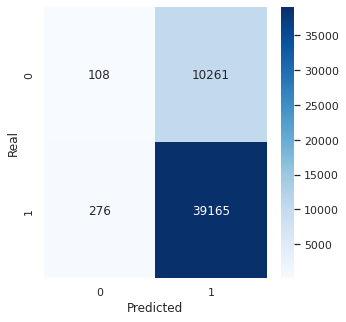

In [109]:
sns.heatmap(performance_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

### cross-validation

In [129]:
# metrics = ['accuracy','precision','recall']

# scores = cross_validate(clf, x_train, y_train, cv=10, scoring=metrics)

# # Avaliação do desempenho
# performance_general_cross = [{'accuracy': scores['test_accuracy'].mean(), 'precision_score': scores['test_precision'].mean(),
#                        'recall_score': scores['test_recall'].mean()}]
# performance_confusion_matrix = confusion_matrix(y_test,y_pred)

# df_performance_naive_general = pd.DataFrame(performance_general)

# # salvar metricas
# df_performance_naive_general.to_csv('performances/df_performance_NAIVE_general_scross.csv', index=False)

# # Imprimir as métricas
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
# print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
# print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))


## Random forest

In [110]:
# Criação do modelo
clf = RandomForestClassifier()

# Treinamento do modelo
clf.fit(x_train, y_train)

# Previsões
y_pred = clf.predict(x_test)

# Avaliação do desempenho
performance_general = [{'accuracy': accuracy_score(y_test, y_pred), 'precision_score': precision_score(y_test,y_pred),
                       'recall_score': recall_score(y_test,y_pred), 'f1_score': f1_score(y_test,y_pred)}]
performance_confusion_matrix = confusion_matrix(y_test,y_pred)

df_performance_RF_general = pd.DataFrame(performance_general)

# salvar metricas
df_performance_RF_general.to_csv('performances/df_performance_RF_general_ncross.csv', index=False)

# salvar o modelo
joblib.dump(clf, 'models/modelRF_ncross.pkl')


['models/modelRF_ncross.pkl']

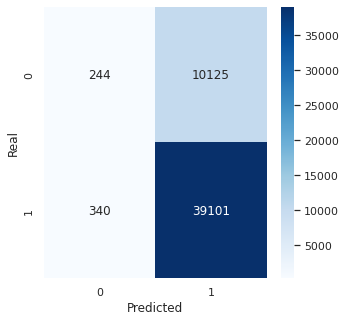

In [111]:
sns.heatmap(performance_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

### cross-validation

In [112]:
# metrics = ['accuracy','precision','recall']

# scores = cross_validate(clf, x_train, y_train, cv=10, scoring=metrics)

# # Avaliação do desempenho
# performance_general_cross = [{'accuracy': scores['test_accuracy'].mean(), 'precision_score': scores['test_precision'].mean(),
#                        'recall_score': scores['test_recall'].mean()}]
# performance_confusion_matrix = confusion_matrix(y_test,y_pred)

# df_performance_RF_general = pd.DataFrame(performance_general)

# # salvar metricas
# df_performance_RF_general.to_csv('performances/df_performance_RF_general_scross.csv', index=False)

# # Imprimir as métricas
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
# print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
# print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))


## XGBoost

In [113]:
# Criação do modelo
clf = XGBClassifier()

# Treinamento do modelo
clf.fit(x_train, y_train)

# Previsões
y_pred = clf.predict(x_test)

# Avaliação do desempenho
performance_general = [{'accuracy': accuracy_score(y_test, y_pred), 'precision_score': precision_score(y_test,y_pred),
                       'recall_score': recall_score(y_test,y_pred), 'f1_score': f1_score(y_test,y_pred)}]
performance_confusion_matrix = confusion_matrix(y_test,y_pred)

df_performance_XG_general = pd.DataFrame(performance_general)

# salvar metricas
df_performance_XG_general.to_csv('performances/df_performance_XG_general_ncross.csv', index=False)

# salvar o modelo
joblib.dump(clf, 'models/modelXG_ncross.pkl')

['models/modelXG_ncross.pkl']

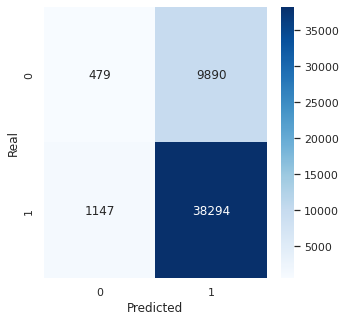

In [114]:
sns.heatmap(performance_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

### cross-validation

In [135]:
# metrics = ['accuracy','precision','recall']

# scores = cross_validate(clf, x_train, y_train, cv=10, scoring=metrics)

# # Avaliação do desempenho
# performance_general_cross = [{'accuracy': scores['test_accuracy'].mean(), 'precision_score': scores['test_precision'].mean(),
#                        'recall_score': scores['test_recall'].mean()}]
# performance_confusion_matrix = confusion_matrix(y_test,y_pred)

# df_performance_XG_general = pd.DataFrame(performance_general)

# # salvar metricas
# df_performance_XG_general.to_csv('performances/df_performance_XG_general_scross.csv', index=False)

# # Imprimir as métricas
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
# print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
# print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))


## MLP

In [115]:
# Criação do modelo
clf = MLPClassifier()

# Treinamento do modelo
clf.fit(x_train, y_train)

# Previsões
y_pred = clf.predict(x_test)

# Avaliação do desempenho
performance_general = [{'accuracy': accuracy_score(y_test, y_pred), 'precision_score': precision_score(y_test,y_pred),
                       'recall_score': recall_score(y_test,y_pred), 'f1_score': f1_score(y_test,y_pred)}]
performance_confusion_matrix = confusion_matrix(y_test,y_pred)

df_performance_MLP_general = pd.DataFrame(performance_general)

# salvar metricas
df_performance_MLP_general.to_csv('performances/df_performance_MLP_general_ncross.csv', index=False)

# salvar o modelo
joblib.dump(clf, 'models/modelMLP_ncross.pkl')

['models/modelMLP_ncross.pkl']

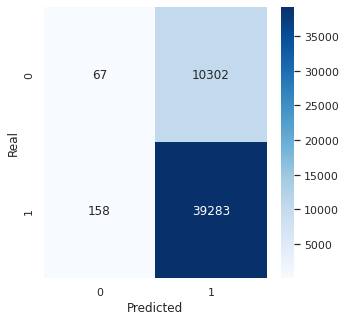

In [116]:
sns.heatmap(performance_confusion_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Real')
plt.show()

### cross-validation

In [117]:
# metrics = ['accuracy','precision','recall']

# scores = cross_validate(clf, x_train, y_train, cv=10, scoring=metrics)

# # Avaliação do desempenho
# performance_general_cross = [{'accuracy': scores['test_accuracy'].mean(), 'precision_score': scores['test_precision'].mean(),
#                        'recall_score': scores['test_recall'].mean()}]
# performance_confusion_matrix = confusion_matrix(y_test,y_pred)

# df_performance_MLP_general = pd.DataFrame(performance_general)

# # salvar metricas
# df_performance_MLP_general.to_csv('performances/df_performance_MLP_general_scross.csv', index=False)

# # Imprimir as métricas
# print("Accuracy: %0.2f (+/- %0.2f)" % (scores['test_accuracy'].mean(), scores['test_accuracy'].std() * 2))
# print("Precision: %0.2f (+/- %0.2f)" % (scores['test_precision'].mean(), scores['test_precision'].std() * 2))
# print("Recall: %0.2f (+/- %0.2f)" % (scores['test_recall'].mean(), scores['test_recall'].std() * 2))


## Compare model's performance

In [118]:
performance_naive = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/performances/df_performance_NAIVE_general_scross.csv')
performance_rf    = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/performances/df_performance_RF_general_scross.csv')
performance_xg    = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/performances/df_performance_XG_general_scross.csv')
performance_mlp   = pd.read_csv('/home/eduardo/Desktop/DS/granting-of-credit/performances/df_performance_MLP_general_scross.csv')

In [119]:
performance_cross_general = pd.concat([performance_naive, performance_rf, performance_xg, performance_mlp]).T
performance_cross_general.columns = ['naive', 'rf', 'xg', 'mlp']

In [120]:
performance_cross_general

,naive,rf,xg,mlp
accuracy,0.788476,0.791889,0.773479,0.785023
precision_score,0.792413,0.791959,0.795802,0.793140
recall_score,0.993002,0.999823,0.960346,0.985548
f1_score,0.881439,0.883834,0.870365,0.878937


- Percebemos então a importância de um modelo baseline, pois se olharmos para a quantidade de segundos gastos para fazer o crossvalidation(preferi pegar esse tempo do que o do treinamento inicial) chegamos em: 
    - Naive
        - 0.435 s
    - Random forest
        - 270 s 
    - XGBoost
        - 90 s
    - Mlp
        - 80 s


- Assim, olhando para as metricas de performance(junto com a matriz de confusão que não apontou nenhuma desproporção nos falsos positivos e negativos) e a quantidade de tempo gasto para o fit(o naive não treina propriamente, então levar como o tempo de calculo das probabilidades), chegamos que o modelo escolhido poderia ser o Naive Bayes, pois performou muito parecido com os outros no conjunto de teste e gastou em média 0,39% do tempo para calcular as probabilidades em coparação com o treinamento dos outros algoritmos.


- No entanto, se olharmos a matriz de confusão, vamos ver que ele na verdade está tendo diversos casos onde temos falso positivo, ou seja ele aprendeu a 'chutar' que o valor de 'TARGET' vai ser 1, por ter bem mais casos dele do que o = 0


- Assim, vamos ter que escolher um modelo mais complexo. O que escolhi foi o XGBoost para fazer a ajuste fino, pois ele tem um bom custo benefício entre o tempo de treinamento e a bom modelo que gera 

# Hyperparameter tuning

- Nessa etapa vou optar por entregar valor mais rapido ao meu cliente(no caso, os avaliadores do meu processo seletivo), então não vou fazer um gridsearch refinado ou um random search com muitas iterações. 


- Prefiro por entregar um modelo funcional para um primeiro ciclo de entrega e refinar em proximos ciclos, onde vou refinar não só essa, mas todas as outras etapas.

- Vou focar em reduzir o numero de falsos positivos.

## Final model

- Para focar em reduzir esse número, vou pensar em 4 parametros chaves 
    - objective -> ajudar a função dizendo qual a tarefa ela ta fazendo
    - eta -> diminuir o passo de aprendizado de 0.3 para 0.2, ela vai demorar mais a convergir, mas vai ser mais generalista
    - max_depth -> a profundidade da árvore como 5 ajuda a não termos problemas de sobreajuste quando o modelo estiver treinado
    - n_estimators -> numero de boosting rounds 100000, ou seja, ele ajuda a o modelo se ajustar mais posi passa mais tempo treinando
    

In [134]:
# # Criação do modelo
# clf_finalmodel = XGBClassifier(objective= "binary:logistic",
#                     eta= 0.2,
#                     max_depth= 5,
#                     n_estimators= 100000)

# # Treinamento do modelo
# clf_finalmodel.fit(x_train, y_train)

# # # Previsões
# y_pred = clf_finalmodel.predict(x_test)

# # Avaliação do desempenho
# performance_general = [{'accuracy': accuracy_score(y_test, y_pred), 'precision_score': precision_score(y_test,y_pred),
#                        'recall_score': recall_score(y_test,y_pred), 'f1_score': f1_score(y_test,y_pred)}]
# performance_confusion_matrix = confusion_matrix(y_test,y_pred)

# df_performance_XG_general = pd.DataFrame(performance_general)


In [122]:
# # salvar metricas
# df_performance_XG_general.to_csv('performances/df_performance_XG_finalmodel.csv', index=False)

# # salvar o modelo
# joblib.dump(clf, 'models/modelXG_finalmodel.pkl')

In [123]:
clf_finalmodel = load('/home/eduardo/Desktop/DS/granting-of-credit/models/modelXG_finalmodel.pkl')

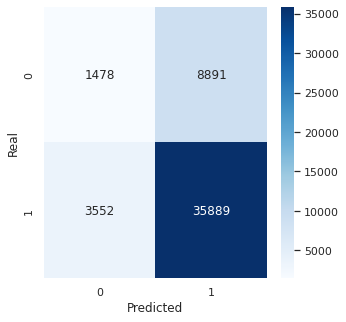

In [125]:
Image( '/home/eduardo/Desktop/DS/granting-of-credit/images/confusion_matrix_finalmodel.png' )

## Generating confidence score

In [154]:
df7_test['SCORE_PREDICTED'] = list(clf_finalmodel.predict_proba(x_test)[:,1])

## Model prediction on the oot dataset

In [136]:
df7_oot['SCORE_PREDICTED'] = list(clf_finalmodel.predict_proba(x_oot)[:,1])

In [366]:
# df7_oot.to_csv('datasets/oot_predicted/df_oot_with_XGB_predictions.csv', index=False)

## Considerations about the model

- O modelo gerado na seção 'Final model' foi muito melhorado em relação ao problema principal do projeto que são os falsos positivos na minha visão


- Isso pode ser visto com a comparação das duas matrizes de confusão abaixo

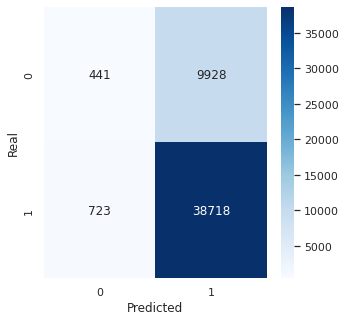

In [367]:
Image( '/home/eduardo/Desktop/DS/granting-of-credit/images/confusion_matrix_nonopt.png' )

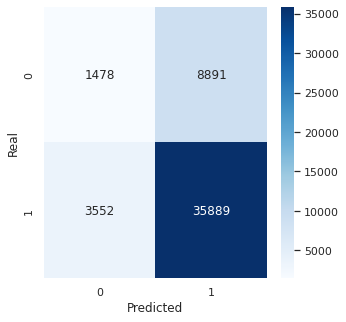

In [368]:
Image( '/home/eduardo/Desktop/DS/granting-of-credit/images/confusion_matrix_finalmodel.png' )

- Foi melhorado muito a classificação dos True negatives, onde mitiga o problema que enfrentamos da analise das performances dos modelos sem nenhuma modificação nos hiperparametros
    - Melhoramos em 3 vezes a taxa de acerto dos True negatives(441 -> 1478)

- **No entanto, com mais hardware e mais treinamento poderiamos conseguir uma relação melhor ainda, chegando no mundo ideal que contem a relaçao abaixo de true negatives e true positives, conseguindo uma escoragem muito mais precisa**

In [362]:
negatives = df7_test['TARGET'].value_counts()[0]
positives = df7_test['TARGET'].value_counts()[1]
print(f'Quantidade de target negatives: {negatives}')
print(f'Quantidade de target positives: {positives}')


Quantidade de target negatives: 10369
Quantidade de target positives: 39441


# Financial Analysis

In [155]:
df8_oot   = df7_oot.copy()
df8_train = df7_train.copy()
df8_test  = df7_test.copy()

## AS-IS

- A resposta que queremos aqui é quantas pessoas estão dentro desse critério da política **AS-IS** 


- Peguei o df4_test, pois esse foi o ultimo dataset onde não tinha feito o rescaling

In [139]:
result_AS = as_is_policy(df4_test)
divida_AS = 1000*(result_AS.shape[0] - result_AS[result_AS['TARGET'] == 1].shape[0])
print(f'Tamanho da carteira de crédito aprovado na política AS-IS seria: R${1000*(result_AS.shape[0])}\n\n')
print(f'A dívida total na política AS-IS seria: R${divida_AS}')


Tamanho da carteira de crédito aprovado na política AS-IS seria: R$38604000


A dívida total na política AS-IS seria: R$7241000


In [140]:
print(f'A porcentagem de divida sobre o valor da carteira de crédito na política AS-IS seria de: {100*((divida_AS) / (1000*(result_AS.shape[0])))} %')

A porcentagem de divida sobre o valor da carteira de crédito na política AS-IS seria de: 18.75712361413325 %


## TO-BE


In [373]:
percentual_teste_negado = (df4_test[df4_test['TARGET'] == 0].shape[0]/df4_test.shape[0])
percentual_teste_negado

0.20817104998996186

In [374]:
df4_test[(df4_test['SCORE_PREDICTED'] <= 0.868)].shape[0]/df4_test.shape[0]

0.20827143143947

In [375]:
result_TO_BE = to_be_policy(df4_test)
divida_TO_BE = 1000*(result_TO_BE[result_TO_BE['TARGET'] == 0].shape[0])

print(f'Tamanho da carteira de crédito aprovado na política TO-BE seria: R${1000*(result_TO_BE.shape[0])}\n\n')
print(f'A dívida total na política TO-BE seria: R${divida_TO_BE}')


Tamanho da carteira de crédito aprovado na política TO-BE seria: R$39436000


A dívida total na política TO-BE seria: R$7576000


In [376]:
print(f'A porcentagem de divida sobre o valor da carteira de crédito na política TO-BE seria de: {100*((divida_TO_BE) / (1000*(result_TO_BE.shape[0])))} %')

A porcentagem de divida sobre o valor da carteira de crédito na política TO-BE seria de: 19.2108733137235 %


## Comparative 

In [354]:
print(f'A dívida total na política AS-IS seria: R${divida_AS}')
print(f'A dívida total na política TO-BE seria: R${divida_TO_BE}')

A dívida total na política AS-IS seria: R$7241000
A dívida total na política TO-BE seria: R$7576000


- Essa é a comparação da dívida que o cliente teve com a política AS_IS versus a quantidade que ele ia ter na TO_BE
    - Conseguimos quase igualar a dívida com algumas horas aproximadamente de treinamento, se treinassemos com um CPU com mais núcleos/threads por mais tempo conseguiriamos melhorar a escoragem do modelo, pois iriam ter cada vez mais true negatives, já qeu a complexidade da XGBoost ainda não chegou no seu limite